In [57]:
# This code is kinda a mess, the first few blocks are designed to create the classification that is used
# to make the interactive plot and then to create the .png images of different viewpoint's kinematic maps,
# which are also used to create the interactive figure

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
import warnings

from sklearn.preprocessing import LabelEncoder

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
def dPA_va(row):
    return row['Delta PA']*row['v_asym']
def dPA_sa(row):
    return row['Delta PA']*row['s_asym']
def dPA_resids(row):
    return row['Delta PA']*row['resids']
def dPA_lambdar(row):
    return row['Delta PA']*row['lambda_r']
def dPA_epsilon(row):
    return row['Delta PA']*row['epsilon']
def dPA_A2(row):
    return row['Delta PA']*row['A_2']
def dPA_deltapos(row):
    return row['Delta PA']*row['deltapos']
def dPA_deltapos2(row):
    return row['Delta PA']*row['deltapos2']
def dPA_nspax(row):
    return row['Delta PA']*row['nspax']
def dPA_re(row):
    return row['Delta PA']*row['re']


def va_sa(row):
    return row['v_asym']*row['s_asym']
def va_resids(row):
    return row['v_asym']*row['resids']
def va_lambdar(row):
    return row['v_asym']*row['lambda_r']
def va_epsilon(row):
    return row['v_asym']*row['epsilon']
def va_A2(row):
    return row['v_asym']*row['A_2']
def va_deltapos(row):
    return row['v_asym']*row['deltapos']
def va_deltapos2(row):
    return row['v_asym']*row['deltapos2']
def va_nspax(row):
    return row['v_asym']*row['nspax']
def va_re(row):
    return row['v_asym']*row['re']


def sa_resids(row):
    return row['s_asym']*row['resids']
def sa_lambdar(row):
    return row['s_asym']*row['lambda_r']
def sa_epsilon(row):
    return row['s_asym']*row['epsilon']
def sa_A2(row):
    return row['s_asym']*row['A_2']
def sa_deltapos(row):
    return row['s_asym']*row['deltapos']
def sa_deltapos2(row):
    return row['s_asym']*row['deltapos2']
def sa_nspax(row):
    return row['s_asym']*row['nspax']
def sa_re(row):
    return row['s_asym']*row['re']



def resids_lambdar(row):
    return row['resids']*row['lambda_r']
def resids_epsilon(row):
    return row['resids']*row['epsilon']
def resids_A2(row):
    return row['resids']*row['A_2']
def resids_deltapos(row):
    return row['resids']*row['deltapos']
def resids_deltapos2(row):
    return row['resids']*row['deltapos2']
def resids_nspax(row):
    return row['resids']*row['nspax']
def resids_re(row):
    return row['resids']*row['re']

def lambdar_epsilon(row):
    return row['lambda_r']*row['epsilon']
def lambdar_A2(row):
    return row['lambda_r']*row['A_2']
def lambdar_deltapos(row):
    return row['lambda_r']*row['deltapos']
def lambdar_deltapos2(row):
    return row['lambda_r']*row['deltapos2']
def lambdar_nspax(row):
    return row['lambda_r']*row['nspax']
def lambdar_re(row):
    return row['lambda_r']*row['re']

def epsilon_A2(row):
    return row['epsilon']*row['A_2']
def epsilon_deltapos(row):
    return row['epsilon']*row['deltapos']
def epsilon_deltapos2(row):
    return row['epsilon']*row['deltapos2']
def epsilon_nspax(row):
    return row['epsilon']*row['nspax']
def epsilon_re(row):
    return row['epsilon']*row['re']

def A2_deltapos(row):
    return row['A_2']*row['deltapos']
def A2_deltapos2(row):
    return row['A_2']*row['deltapos2']
def A2_nspax(row):
    return row['A_2']*row['nspax']
def A2_re(row):
    return row['A_2']*row['re']

def deltapos_deltapos2(row):
    return row['deltapos']*row['deltapos2']
def deltapos_nspax(row):
    return row['deltapos']*row['nspax']
def deltapos_re(row):
    return row['deltapos']*row['re']

def deltapos2_nspax(row):
    return row['deltapos2']*row['nspax']
def deltapos2_re(row):
    return row['deltapos2']*row['re']

def nspax_re(row):
    return row['nspax']*row['re']

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
  


def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)



feature_dict = {i:label for i,label in zip(
                range(15),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos',
                  'deltapos2',
                  'nspax','re'))}
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result


In [70]:
# Right now I'm just running the classification for one simulation
# but the eventual goal is to create some sort of loop that will
# produce different tabs in the interactive plot for each different
# simulation (I think this won't be too hard)

list_runs=['major_merger_degraded','minor_merger_degraded',
           'fg3_m12_degraded','fg3_m13_degraded','fg1_m13_degraded','fg3_m15_degraded','fg3_m10_degraded']
colors=["#ED303C","#A0EEC0", "#F5634A","#FF9C5B",
        "#FAD089","#86CD82","#254E70"]
names=['Major Merger','Minor Merger','q0.5_fg0.3','q0.333_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']
titles=['Major Merger','Minor Merger','q = 0.5, f$_g$ = 0.3','q = 0.333, f$_g$ = 0.3','q = 0.333, f$_g$ = 0.1',
        'q = 0.2, f$_g$ = 0.3, B/T = 0.2','q = 0.1, f$_g$ = 0.3, B/T = 0.2']

blue='#3B8183'#'#6665DD'
priors_list=[[0.9,0.1],[0.7,0.3],[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]
vers_list=['','','','','','','']
images=''

plt.clf()
missclass_list=[]


LDA_time=[]
myr_total=[]


num_comps_list=[]
missclass_list_1=[]
missclass_list_1_e=[]
min_comps_list=[]
min_A_list=[]

dPA_means_all=[]
va_means_all=[]
color_means_all=[]
sa_means_all=[]
resids_means_all=[]
lambdar_means_all=[]
epsilon_means_all=[]

A2_means_all=[]
deltapos_means_all=[]
deltapos2_means_all=[]
nspax_means_all=[]
re_means_all=[]

dPA_means_all_non=[]
va_means_all_non=[]
color_means_all_non=[]
sa_means_all_non=[]
resids_means_all_non=[]
lambdar_means_all_non=[]
epsilon_means_all_non=[]

A2_means_all_non=[]
deltapos_means_all_non=[]
deltapos2_means_all_non=[]
nspax_means_all_non=[]
re_means_all_non=[]

# Things to save for the purpose of the interactive part:
significant_coef_list=[]
significant_std_list=[]
significant_term_list=[]

myr_list_list=[]
myr_list_sorted_left_list=[]
myr_list_sorted_right_list=[]

myr_here_list=[]

input_1_means_list=[]
input_2_means_list=[]
input_3_means_list=[]

input_1_means_list_non=[]
input_2_means_list_non=[]
input_3_means_list_non=[]

input_1_means_list_non_ind=[]
input_2_means_list_non_ind=[]
input_3_means_list_non_ind=[]

input_1_means_list_ind=[]
input_2_means_list_ind=[]
input_3_means_list_ind=[]

input_4_means_list=[]
input_5_means_list=[]
input_6_means_list=[]

input_4_means_list_non=[]
input_5_means_list_non=[]
input_6_means_list_non=[]

input_4_means_list_non_ind=[]
input_5_means_list_non_ind=[]
input_6_means_list_non_ind=[]

input_4_means_list_ind=[]
input_5_means_list_ind=[]
input_6_means_list_ind=[]



list_inter_list=[]
new_min_index_list=[]

new_means_list=[]
std_list=[]

mean_non_list=[]

coalescence_list=[]
early_list=[]

new_means_non_left_list=[]
std_non_left_list=[]

new_means_non_right_list=[]
std_non_right_list=[]

myr_here_non_left_list=[]
myr_here_non_right_list=[]

my_list_LDA_list = []
my_list_LDA_non_left_list = []
my_list_LDA_non_right_list = []
for i in range(len(list_runs)):
    i=i+2
    add_on=list_runs[i]
    
    vers = vers_list[i]
    
    
        
    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='../LDA_kin_spax_'+str(vers)+str(images)+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
   
    #df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end


    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.39:#df[['Myr']].values[i][0]
            df.at[j,'class label']=0
        if add_on[:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.at[j,'class label']=0
        if add_on[:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:5]=='major':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#q0.5_fg0.3
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:
                df.set_value(j,'class label',0)
        if add_on[:5]=='minor':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            
      

    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))


    
    

    
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    
    
    
    
    
    
    
    #~~~~~~~~~~~~~~~~
    
    
    df['dPA*va'] = df.apply(dPA_va,axis=1)
    df['dPA*sa'] = df.apply(dPA_sa,axis=1)
    df['dPA*resids'] = df.apply(dPA_resids,axis=1)
    df['dPA*lambdar'] = df.apply(dPA_lambdar,axis=1)
    df['dPA*epsilon'] = df.apply(dPA_epsilon,axis=1)
    df['dPA*A2'] = df.apply(dPA_A2,axis=1)
    df['dPA*deltapos'] = df.apply(dPA_deltapos,axis=1)
    df['dPA*deltapos2'] = df.apply(dPA_deltapos2,axis=1)
    df['dPA*nspax'] = df.apply(dPA_nspax,axis=1)
    df['dPA*re'] = df.apply(dPA_re,axis=1)
  
    df['va*sa'] = df.apply(va_sa,axis=1)
    df['va*resids'] = df.apply(va_resids,axis=1)
    df['va*lambdar'] = df.apply(va_lambdar,axis=1)
    df['va*epsilon'] = df.apply(va_epsilon,axis=1)
    df['va*A2'] = df.apply(va_A2,axis=1)
    df['va*deltapos'] = df.apply(va_deltapos,axis=1)
    df['va*deltapos2'] = df.apply(va_deltapos2,axis=1)
    df['va*nspax'] = df.apply(va_nspax,axis=1)
    df['va*re'] = df.apply(va_re,axis=1)
   
    
    df['sa*resids'] = df.apply(sa_resids,axis=1)
    df['sa*lambdar'] = df.apply(sa_lambdar,axis=1)
    df['sa*epsilon'] = df.apply(sa_epsilon,axis=1)
    df['sa*A2'] = df.apply(sa_A2,axis=1)
    df['sa*deltapos'] = df.apply(sa_deltapos,axis=1)
    df['sa*deltapos2'] = df.apply(sa_deltapos2,axis=1)
    df['sa*nspax'] = df.apply(sa_nspax,axis=1)
    df['sa*re'] = df.apply(sa_re,axis=1)    
    
    
    df['resids*lambdar'] = df.apply(resids_lambdar,axis=1)
    df['resids*epsilon'] = df.apply(resids_epsilon,axis=1)
    df['resids*A2'] = df.apply(resids_A2,axis=1)
    df['resids*deltapos'] = df.apply(resids_deltapos,axis=1)
    df['resids*deltapos2'] = df.apply(resids_deltapos2,axis=1)
    df['resids*nspax'] = df.apply(resids_nspax,axis=1)
    df['resids*re'] = df.apply(resids_re,axis=1)
  
    
    
    
    df['lambdar*epsilon'] = df.apply(lambdar_epsilon,axis=1)
    df['lambdar*A2'] = df.apply(lambdar_A2,axis=1)
    df['lambdar*deltapos'] = df.apply(lambdar_deltapos,axis=1)
    df['lambdar*deltapos2'] = df.apply(lambdar_deltapos2,axis=1)
    df['lambdar*nspax'] = df.apply(lambdar_nspax,axis=1)
    df['lambdar*re'] = df.apply(lambdar_re,axis=1)
 
    
    df['epsilon*A2'] = df.apply(epsilon_A2,axis=1)
    df['epsilon*deltapos'] = df.apply(epsilon_deltapos,axis=1)
    df['epsilon*deltapos2'] = df.apply(epsilon_deltapos2,axis=1)
    df['epsilon*nspax'] = df.apply(epsilon_nspax,axis=1)
    df['epsilon*re'] = df.apply(epsilon_re,axis=1)
    
    
    df['A2*deltapos'] = df.apply(A2_deltapos,axis=1)
    df['A2*deltapos2'] = df.apply(A2_deltapos2,axis=1)
    df['A2*nspax'] = df.apply(A2_nspax,axis=1)
    df['A2*re'] = df.apply(A2_re,axis=1)
    
    df['deltapos*deltapos2'] = df.apply(deltapos_deltapos2,axis=1)
    df['deltapos*nspax'] = df.apply(deltapos_nspax,axis=1)
    df['deltapos*re'] = df.apply(deltapos_re,axis=1)
    
    df['deltapos2*nspax'] = df.apply(deltapos2_nspax,axis=1)
    df['deltapos2*re'] = df.apply(deltapos2_re,axis=1)
    
    df['nspax*re'] = df.apply(nspax_re,axis=1)
    


    
    
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A_2','deltapos','deltapos2','nspax','re']].values
    
    
    
    dPA = {key:[] for key in myr}
    va = {key:[] for key in myr}
    sa = {key:[] for key in myr}
    resids = {key:[] for key in myr}
    lambdar = {key:[] for key in myr}
    epsilon = {key:[] for key in myr}
    A2 = {key:[] for key in myr}
    deltapos = {key:[] for key in myr}
    deltapos2 = {key:[] for key in myr}
    nspax = {key:[] for key in myr}
    re = {key:[] for key in myr}
    
    
    
    dPA_std = {key:[] for key in myr}
    va_std = {key:[] for key in myr}
    sa_std = {key:[] for key in myr}
    resids_std = {key:[] for key in myr}
    lambdar_std = {key:[] for key in myr}
    epsilon_std = {key:[] for key in myr}
    A2_std = {key:[] for key in myr}
    deltapos_std = {key:[] for key in myr}
    deltapos2_std = {key:[] for key in myr}
    

    dPA_non = {key:[] for key in myr_non}
    va_non = {key:[] for key in myr_non}
    sa_non = {key:[] for key in myr_non}
    resids_non = {key:[] for key in myr_non}
    lambdar_non = {key:[] for key in myr_non}
    epsilon_non = {key:[] for key in myr_non}
    A2_non = {key:[] for key in myr_non}
    deltapos_non = {key:[] for key in myr_non}
    deltapos2_non = {key:[] for key in myr_non}
    nspax_non = {key:[] for key in myr_non}
    re_non = {key:[] for key in myr_non}

    
        
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}


    epsilon_all=[]
    epsilon_all_non=[]
    vasym_all=[]
    vasym_all_non=[]
    lambdar_all_non=[]
    lambdar_all=[]
    resids_all_non=[]
    resids_all=[]
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            epsilon_all_non.append(X[l,5])
            lambdar_all_non.append(X[l,4])
            resids_all_non.append(X[l,3])
            
            dPA_non[df[['Myr']].values[l][0]].append(X[l,0])
            va_non[df[['Myr']].values[l][0]].append(X[l,1])
            sa_non[df[['Myr']].values[l][0]].append(X[l,2])
            resids_non[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar_non[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon_non[df[['Myr']].values[l][0]].append(X[l,5])
            A2_non[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos_non[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2_non[df[['Myr']].values[l][0]].append(X[l,8])
            nspax_non[df[['Myr']].values[l][0]].append(X[l,9])
            re_non[df[['Myr']].values[l][0]].append(X[l,10])
            
            
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            epsilon_all.append(X[l,5])
            lambdar_all.append(X[l,4])
            resids_all.append(X[l,3])
            dPA[df[['Myr']].values[l][0]].append(X[l,0])
            va[df[['Myr']].values[l][0]].append(X[l,1])
            sa[df[['Myr']].values[l][0]].append(X[l,2])
            resids[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon[df[['Myr']].values[l][0]].append(X[l,5])
            A2[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2[df[['Myr']].values[l][0]].append(X[l,8])
            nspax[df[['Myr']].values[l][0]].append(X[l,9])
            re[df[['Myr']].values[l][0]].append(X[l,10])

    
    #list1, list2, list3, list4 = ([] for i in range(4))  
    dPA_list_all_non, va_list_all_non, sa_list_all_non, resids_list_all_non, lambdar_list_all_non,epsilon_list_all_non,A2_list_all_non,deltapos_list_all_non,deltapos2_list_all_non,color_list_all_non, nspax_list_all_non,re_list_all_non=([] for i in range(12))
    

    dPA_list_all,va_list_all,sa_list_all,resids_list_all,lambdar_list_all,epsilon_list_all,A2_list_all,deltapos_list_all,deltapos2_list_all,color_list_all, nspax_list_all, re_list_all=([] for i in range(12))

    dPA_means_non,va_means_non,sa_means_non,resids_means_non,lambdar_means_non,epsilon_means_non,A2_means_non,deltapos_means_non,deltapos2_means_non,color_means_non, nspax_means_non, re_means_non=([] for i in range(12))
    
    
    
    counter_overall_non=0
    
    for k in range(len(dPA_non)):
        for z in range(len(dPA_non[myr_non[k]])):
            counter_overall_non+=1
            dPA_list_all_non.append((dPA_non[myr_non[k]][z]))
            va_list_all_non.append((va_non[myr_non[k]][z]))
            sa_list_all_non.append((sa_non[myr_non[k]][z]))
            
            resids_list_all_non.append((resids_non[myr_non[k]][z]))
            
            lambdar_list_all_non.append((lambdar_non[myr_non[k]][z]))
            epsilon_list_all_non.append((epsilon_non[myr_non[k]][z]))
            A2_list_all_non.append((A2_non[myr_non[k]][z]))
            deltapos_list_all_non.append((deltapos_non[myr_non[k]][z]))
            deltapos2_list_all_non.append((deltapos2_non[myr_non[k]][z]))
            nspax_list_all_non.append((nspax_non[myr_non[k]][z]))
            re_list_all_non.append((re_non[myr_non[k]][z]))
 
            color_list_all_non.append(myr_non[k]/1)
            
         
        dPA_means_non.append(np.mean(dPA_non[myr_non[k]][:]))
        va_means_non.append(np.mean(va_non[myr_non[k]][:]))
        sa_means_non.append(np.mean(sa_non[myr_non[k]][:]))
        resids_means_non.append(np.mean(resids_non[myr_non[k]][:]))
        
        lambdar_means_non.append(np.mean(lambdar_non[myr_non[k]][:]))
        epsilon_means_non.append(np.mean(epsilon_non[myr_non[k]][:]))
        A2_means_non.append(np.mean(A2_non[myr_non[k]][:]))
        deltapos_means_non.append(np.mean(deltapos_non[myr_non[k]][:]))
        deltapos2_means_non.append(np.mean(deltapos2_non[myr_non[k]][:]))
        nspax_means_non.append(np.mean(nspax_non[myr_non[k]][:]))
        re_means_non.append(np.mean(re_non[myr_non[k]][:]))
        
        
        
        color_means_non.append((myr_non[k]))
        
    dPA_means=[]
    va_means=[]
    sa_means=[]
    resids_means=[]
    lambdar_means=[]
    epsilon_means=[]
    A2_means=[]
    deltapos_means=[]
    deltapos2_means=[]
    color_means=[]
    nspax_means=[]
    re_means=[]
    
    counter_overall=0
  
    for k in range(len(dPA)):
        for z in range(len(dPA[myr[k]])):
            counter_overall+=1
            dPA_list_all.append((dPA[myr[k]][z]))
            va_list_all.append((va[myr[k]][z]))
            sa_list_all.append((sa[myr[k]][z]))
            lambdar_list_all.append((lambdar[myr[k]][z]))
            epsilon_list_all.append((epsilon[myr[k]][z]))
            A2_list_all.append((A2[myr[k]][z]))
            deltapos_list_all.append((deltapos[myr[k]][z]))
            deltapos2_list_all.append((deltapos2[myr[k]][z]))
            nspax_list_all.append((nspax[myr[k]][z]))
            re_list_all.append((re[myr[k]][z]))

            color_list_all.append((myr[k]))
            
        dPA_means.append(np.mean(dPA[myr[k]][:]))
        va_means.append(np.mean(va[myr[k]][:]))
        sa_means.append(np.mean(sa[myr[k]][:]))
        resids_means.append(np.mean(resids[myr[k]][:]))
        lambdar_means.append(np.mean(lambdar[myr[k]][:]))
        epsilon_means.append(np.mean(epsilon[myr[k]][:]))
        A2_means.append(np.mean(A2[myr[k]][:]))
        deltapos_means.append(np.mean(deltapos[myr[k]][:]))
        deltapos2_means.append(np.mean(deltapos2[myr[k]][:]))
        nspax_means.append(np.mean(nspax[myr[k]][:]))
        re_means.append(np.mean(re[myr[k]][:]))

        color_means.append((myr[k]/1))

    
    dPA_means_all.append(dPA_means)
    va_means_all.append(va_means)
    sa_means_all.append(sa_means)
    resids_means_all.append(resids_means)
    lambdar_means_all.append(lambdar_means)
    epsilon_means_all.append(epsilon_means)
    A2_means_all.append(A2_means)
    deltapos_means_all.append(deltapos_means)
    deltapos2_means_all.append(deltapos2_means)
    color_means_all.append(color_means)
    nspax_means_all.append(nspax_means)
    re_means_all.append(re_means)
   
    
    dPA_means_all_non.append(dPA_means_non)
    va_means_all_non.append(va_means_non)
    sa_means_all_non.append(sa_means_non)
    resids_means_all_non.append(resids_means_non)
    lambdar_means_all_non.append(lambdar_means_non)
    epsilon_means_all_non.append(epsilon_means_non)
    A2_means_all_non.append(A2_means_non)
    deltapos_means_all_non.append(deltapos_means_non)
    deltapos2_means_all_non.append(deltapos2_means_non)
    color_means_all_non.append(color_means_non)
    nspax_means_all_non.append(nspax_means_non)
    re_means_all_non.append(re_means_non)

    plt.clf()
    fig=plt.figure(figsize=(15,5))
    ax0 = fig.add_subplot(221)
    print(re_list_all)
    ax0.hist(re_list_all, label='Merger', alpha=0.7, color='#FAAE47', density=True)
    ax0.hist(re_list_all_non, label='Nonmerger', alpha=0.7, color='#333A48', density=True)
    ax0.set_title('$R_e$')
    plt.legend()
    
    ax1 = fig.add_subplot(222)
    
    ax1.hist(nspax_list_all, label='Merger', alpha=0.7, color='#FAAE47', density=True)
    ax1.hist(nspax_list_all_non, label='Nonmerger', alpha=0.7, color='#333A48', density=True)
    ax1.set_title('# Spaxels')
    plt.legend()
    
    ax2 = fig.add_subplot(223)
    
    ax2.hist(epsilon_list_all, label='Merger', alpha=0.7, color='#FAAE47', density=True)
    ax2.hist(epsilon_list_all_non, label='Nonmerger', alpha=0.7, color='#333A48', density=True)
    ax2.set_title('$\epsilon$')
    plt.legend()
    
    ax3 = fig.add_subplot(224)
    
    ax3.hist(lambdar_list_all, label='Merger', alpha=0.7, color='#FAAE47', density=True)
    ax3.hist(lambdar_list_all_non, label='Nonmerger', alpha=0.7, color='#333A48', density=True)
    ax3.set_title('$\lambda_{R_e}$')
    plt.legend()
    plt.tight_layout()
    plt.savefig('histograms_inc_size_'+str(run)+'.png')
    #STOP#here
    
    
    '''import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    
    
    im1=ax1.scatter(deltapos2_means, deltapos_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
        
    im2=ax1.scatter(deltapos2_means_non, deltapos_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
    cb_1= plt.colorbar(im2, orientation='vertical')
    cb_1.ax.tick_params(labelsize=20)
    
    
    ax1.set_xlabel('$\Delta$x$_{\mathrm{vel}}$', size=20)
    ax1.set_ylabel(r'$\Delta$x', size=20)
    
    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    #plt.tight_layout()
    
    if add_on[:9]=='major_all':
        plt.annotate('Major Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    if add_on[:9]=='minor_all':
        plt.annotate('Minor Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    
    #plt.tight_layout()
    plt.savefig('../Kin_Figures/time_evo_deltapos2_deltapos_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    
    
    im1=ax1.scatter(resids_means, deltapos_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    im2=ax1.scatter(resids_means_non, deltapos_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
    cb_1= plt.colorbar(im2, orientation='vertical')
    cb_1.ax.tick_params(labelsize=20)
    
    
    ax1.set_xlabel('resids', size=20)
    ax1.set_ylabel(r'$\Delta$x', size=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig('../Kin_Figures/time_evo_resids_deltapos_'+str(run)+'.pdf', bbox_inches="tight")
    
    #The two plots were definitely going to want to make are the v_asy, sigma_asym plot from Shapiro
    #and the lambda_r, epsilon plot from Emsellem2007,2011,Cappellari
    dashed_line_x=np.linspace(0.01,0.5,100)
    #the equation is sqrt(y**2+x**2) = 0.5
    #y = np.sqrt(0.5**2 - x**2)
    dashed_line_y=[np.sqrt(0.5**2-x**2) for x in dashed_line_x]
    dotted_line_x=np.linspace(0.01,0.15,100)
    dotted_line_y=[np.sqrt(0.15**2-x**2) for x in dotted_line_x]
    
    
    
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')
    ax1.plot(dotted_line_x, dotted_line_y, ls=':', color='black')


    im1=ax1.scatter(sa_means, va_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    im2=ax1.scatter(sa_means_non, va_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
    cb_1= plt.colorbar(im2, orientation='vertical')
    cb_1.ax.tick_params(labelsize=20)
    
    
    ax1.set_xlim([0.01,10])#[max(m20_means),min(m20_means)])
    ax1.set_ylim([0.01,10])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel('$\sigma_{\mathrm{asym}}$', size=20)
    ax1.set_ylabel(r'v$_{\mathrm{asym}}$', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))
    ax1.set_yscale('log')
    ax1.set_xscale('log')


    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    #plt.tight_layout()
    
    if add_on[:9]=='major_all':
        plt.annotate('Major Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    if add_on[:9]=='minor_all':
        plt.annotate('Minor Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    
    #plt.tight_layout()
    plt.savefig('../Kin_Figures/time_evo_va_sa_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    
    
    #The two plots were definitely going to want to make are the v_asy, sigma_asym plot from Shapiro
    #and the lambda_r, epsilon plot from Emsellem2007,2011,Cappellari
    dashed_line_x=np.linspace(0.0,0.4,100)
    #the equation is sqrt(y**2+x**2) = 0.5
    #y = np.sqrt(0.5**2 - x**2)
    dashed_line_y=[0.08+x/4 for x in dashed_line_x]
    
    dashed_line_x_2 = 0.4*np.ones(100)
    dashed_line_y_2 = np.linspace(0,0.18,100)
    
    
    
      


    
    import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')
    ax1.plot(dashed_line_x_2, dashed_line_y_2, ls='--', color='black')


    im1=ax1.scatter(epsilon_means,lambdar_means,  s=35,c=color_means, cmap='Reds',edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    

    
    im2=ax1.scatter(epsilon_means_non,lambdar_means_non,  s=35,c=color_means_non, cmap='Blues',edgecolors= "blue")
    cb2=plt.colorbar(im2,orientation='vertical')
    cb2.ax.tick_params(labelsize=20)
    
    
    ax1.set_xlim([0,0.9])#[max(m20_means),min(m20_means)])
    ax1.set_ylim([0,0.8])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'$\epsilon$', size=20)
    ax1.set_ylabel('$\lambda_{\mathrm{R_e}}$', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig('../Kin_Figures/time_evo_epsilon_lambdar_'+str(run)+'.pdf', bbox_inches="tight")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    #ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')
    #ax1.plot(dashed_line_x_2, dashed_line_y_2, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(dPA_means,A2_means,  s=35,c=color_means, cmap='Reds', edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    
        
    
    im2=ax1.scatter(dPA_means_non,A2_means_non,  s=35,c=color_means_non, cmap='Blues', edgecolors= "blue")
    cb2=plt.colorbar(im2,orientation='vertical')
    cb2.ax.tick_params(labelsize=20)
    
    
    ax1.set_xlabel(r'$\Delta$PA', size=20)
    
    ax1.set_ylabel('$A_2$', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig('../Kin_Figures/time_evo_Delta_PA_A2_'+str(run)+'.pdf', bbox_inches="tight")'''
    
    
    
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    #~~~~~~~~~~~~~~~~~~~~~Below is the stats section:
    
    
        
    plt.clf()
    plt.scatter(epsilon_all_non, lambdar_all_non, color='blue', label='Nonmergers')
    plt.scatter(epsilon_all, lambdar_all, color='red', label='Mergers')
    plt.xlabel('$\epsilon$')
    plt.ylabel('$\lambda_{\mathrm{R_e}}$')
    #plt.xlim([0,1])
    plt.legend()
    plt.tight_layout()
    plt.savefig('../Kin_Figures/epsilon_lambda'+str(vers)+str(images)+'_'+str(run)+'.pdf')
    plt.clf()
    plt.scatter(epsilon_all_non, resids_all_non, color='blue', label='Nonmergers')
    plt.scatter(epsilon_all, resids_all, color='red', label='Mergers')
    plt.xlabel('$\epsilon$')
    plt.ylabel('resids')
    #plt.xlim([0,1])
    plt.legend()
    plt.tight_layout()
    plt.savefig('../Kin_Figures/epsilon_resids'+str(vers)+str(images)+'_'+str(run)+'.pdf')
   
    
    
    
    
    '''Check for some statistical assumptions'''
    '''Testing for normality with KS'''
    
    
    df_nonmerg = df[df['class label'] == 0]
    df_merg = df[df['class label'] == 1]
    
    IVS=["Delta PA","s_asym","resids","lambda_r","epsilon","A_2","deltapos","deltapos2","nspax","re"]
    for k in range(len(IVS)):
        print('IV', IVS[k])
        ks_results = scipy.stats.kstest(df_merg.filter([IVS[k]]), cdf='norm')
        shapiro_results = scipy.stats.shapiro(df_merg.filter([IVS[k]]))
        #print('ks_results', ks_results)
        print('SW results', shapiro_results)
        shapiro_results = scipy.stats.shapiro(df_nonmerg.filter([IVS[k]]))
        #print('ks_results', ks_results)
        print('SW results', shapiro_results)
        
    '''Test for non-homogeneity of variance-covariance matrices'''
    sample1=df_nonmerg.loc[:,"Delta PA":"re"]
    #df_nonmerg["Gini","M20","Concentration (C)","Asymmetry (A)","Clumpiness (S)","Sersic N","Shape Asymmetry"]
    sample2=df_merg.loc[:,"Delta PA":"re"]
    #df_merg["Gini","M20","Concentration (C)","Asymmetry (A)","Clumpiness (S)","Sersic N","Shape Asymmetry"]
    print('shape sample1', np.shape(sample1), 'shape sample2', np.shape(sample2))
    
    
    plt.clf()
    from sci_analysis import analyze
    

    
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    
    
    
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2','nspax','re']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
    #print('len', len(X_train), len(X_test), len(y_train), len(y_test))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    
    # Note the difference in argument order
    
    import pandas as pd
    import numpy as np
    from sklearn import datasets, linear_model
    from sklearn.linear_model import LinearRegression
    import statsmodels.api as sm
    from scipy import stats
    
    # Train the model using the training sets
    regress = regr.fit(X_train, y_train)
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(run)
    print('OLS Regression Output')
    print(est2.summary())
    
    # Make predictions using the testing set
    y_pred = est2.predict(sm.add_constant(X_test))
    # okay but this is actually logistic so maybe I then go and make this either 1 or 2
    y_pred_binary=[]
    for h in range(len(y_pred)):
        if y_pred[h]>1.5:
            y_pred_binary.append(2)
        else:
            y_pred_binary.append(1)
    master = confusion_matrix(y_pred_binary, y_test)
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    
    
    # Time to do the same thing but for logistic regression :)
    enc = LabelEncoder()
    label_encoder = enc.fit(y_train)
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    logistic = sm.Logit(y_train, X2).fit()
    print('LOGISTIC Regression Output')
    print(logistic.summary())
    y_pred = logistic.predict(sm.add_constant(X_test))
    y_pred_binary=[]
    for h in range(len(y_pred)):
        if y_pred[h]>0.5:
            y_pred_binary.append(1)
        else:
            y_pred_binary.append(0)
    master = confusion_matrix(y_pred_binary, y_test)
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    
    print('trying regularization')
    results = sm.Logit(y_train, X2).fit_regularized(method='l1', alpha=1.0, L1_wt=0.0)
    print(results.summary())
    
    y_pred = results.predict(sm.add_constant(X_test))
    y_pred_binary=[]
    for h in range(len(y_pred)):
        if y_pred[h]>0.5:
            y_pred_binary.append(1)
        else:
            y_pred_binary.append(0)
    master = confusion_matrix(y_pred_binary, y_test)
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    '''#play with regularization also
    # sklearn output
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(fit_intercept = True, C = 1e9)
    mdl = model.fit(X, y)
    print(model.coef_)
    print(model.summary())
    
    model = LogisticRegression(fit_intercept = True, C = 1)
    mdl = model.fit(X, y)
    print(model.coef_)
    print(model.summary())
    STOP
    continue'''
    

    
    # I expect to see RuntimeWarnings in this block
    with warnings.catch_warnings():
        '''with warnings.catch_warnings():
    warnings.filterwarnings('error')
'''
        warnings.simplefilter("ignore")#, category=MatplotlibDeprecationWarning)
        
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % r2_score(y_test, y_pred))
        #Now time to compute R^2 values for the entire freaking thing
        for k in range(len(IVS)):
            for j in range(len(IVS)):

                
                regr.fit(df.filter([IVS[k]]), df.filter([IVS[j]]))
                y_pred = regr.predict(df.filter([IVS[k]]))
                if r2_score(df.filter([IVS[j]]), y_pred) > 0.5 and r2_score(df.filter([IVS[j]]), y_pred) != 1:
                    print('Regressing these IVs', IVS[k], IVS[j])
                    print('Variance score: %.2f' % r2_score(df.filter([IVS[j]]), y_pred))
    
    
    

    STOP
    
    
    
    '''Calculate correlation'''
    plt.clf()
    import seaborn as sns
    
    
    print('most highly corr',mosthighlycorrelated(df.loc[:,"Delta PA":"re"], 10))
    
    
   # continue
    #~~~~~~~~~~~~~~~~~~~~~~
    
    #first do it with only the primary coefficients
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2','nspax','re']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}




    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)


    
    
    
     

    
    
    import seaborn
    sns.set_style("darkgrid")
    
 
    
    
  
    inputs=['Delta PA','v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2','nspax','re']
    
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=RuntimeWarning)
                # LDA
                sklearn_lda = LDA(solver='svd',priors=priors_list[i], store_covariance=True)#store_covariance=False


                X_lda_sklearn = sklearn_lda.fit_transform(X, y)

                dec = sklearn_lda.score(X,y)
                prob = sklearn_lda.predict_proba(X)

                coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( solver='svd',priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2','nspax','re']].values
    
    y = df['class label'].values
    
    from sklearn import preprocessing

    #print(prev_input)
    print('ONLY PRIMARY TERMS')
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    print(significant_term, significant_coef, significant_std)
    print('reversed list?', significant_term[::-1])
    if len(significant_term[::-1]) < 1:
        # We have to figure out how many terms to include
        significant_term = []
        significant_coef = []
        significant_std = []
        for l in range(len(sortedinput)):
            if float(abs(list_coef[new_min_index][0][inds][l]) - list_coef_std[new_min_index][0][inds][l]) > 0:
                #then it is still significant to 3. sigma
                significant_term.append(sortedinput[l])
                significant_coef.append(list_coef[new_min_index][0][inds][l])
                significant_std.append(list_coef_std[new_min_index][0][inds][l])
        # this next section is entirely for the interactive plot:
        print(significant_term, significant_coef, significant_std)
        print('reversed list?', significant_term[::-1])
        
    
    
    
    if len(significant_term) > 1:
    
        X = df[significant_term[::-1]].values
        std_scale = preprocessing.StandardScaler().fit(X)

        X = std_scale.transform(X)

        # These are all the. variables scaled
        # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?

        input_1 = {key:[] for key in myr}
        input_2 = {key:[] for key in myr}
        input_3 = {key:[] for key in myr}
        input_4 = {key:[] for key in myr}
        input_5 = {key:[] for key in myr}
        input_6 = {key:[] for key in myr}

        input_1_non = {key:[] for key in myr_non}
        input_2_non = {key:[] for key in myr_non}
        input_3_non = {key:[] for key in myr_non}
        input_4_non = {key:[] for key in myr_non}
        input_5_non = {key:[] for key in myr_non}
        input_6_non = {key:[] for key in myr_non}







        for q in range(len(myr)):
            for r in range(7):
                input_1[myr[q]].append(888)
                input_2[myr[q]].append(888)
                input_3[myr[q]].append(888)
                input_4[myr[q]].append(888)
                input_5[myr[q]].append(888)
                input_6[myr[q]].append(888)



        for q in range(len(myr_non)):
            for r in range(7):
                input_1_non[myr_non[q]].append(888)
                input_2_non[myr_non[q]].append(888)
                input_3_non[myr_non[q]].append(888)
                input_4_non[myr_non[q]].append(888)
                input_5_non[myr_non[q]].append(888)
                input_6_non[myr_non[q]].append(888)



        all_inputs = [input_1, input_2, input_3,input_4,input_5,input_6] 
        all_inputs_non = [input_1_non, input_2_non, input_3_non,input_4_non,input_5_non,input_6_non]

        if len(significant_term[::-1]) > 6:
            len_sig = 6
        else:
            len_sig = len(significant_term[::-1])

        for l in range(len(df)):
            if df[['class label']].values[l]==1:
                for i in range(len_sig):
                    all_inputs[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])
            else:
                for i in range(len_sig):
                    all_inputs_non[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])


        input_1_means=[]
        input_2_means=[]
        input_3_means=[]
        input_4_means=[]
        input_5_means=[]
        input_6_means=[]

        input_means_list = [input_1_means, input_2_means, input_3_means, input_4_means, input_5_means,input_6_means]

        for k in range(len(input_1)):
            input_1_list_all=[]
            input_2_list_all=[]
            input_3_list_all=[]
            input_4_list_all=[]
            input_5_list_all=[]
            input_6_list_all=[]
            input_list_all_list = [input_1_list_all,input_2_list_all,input_3_list_all,input_4_list_all,input_5_list_all,input_6_list_all]
            for z in range(len(all_inputs[0][myr[k]])):
                for i in range(len_sig):
                    input_list_all_list[i].append((all_inputs[i][myr[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888])




        input_1_means_non=[]
        input_2_means_non=[]
        input_3_means_non=[]
        input_4_means_non=[]
        input_5_means_non=[]
        input_6_means_non=[]

        input_means_list_non = [input_1_means_non, input_2_means_non, 
                            input_3_means_non, input_4_means_non, 
                            input_5_means_non, input_6_means_non]


        for k in range(len(input_1_non)):
            input_1_list_all_non=[]
            input_2_list_all_non=[]
            input_3_list_all_non=[]
            input_4_list_all_non=[]
            input_5_list_all_non=[]
            input_6_list_all_non=[]
            input_list_all_list_non = [input_1_list_all_non,input_2_list_all_non,
                                       input_3_list_all_non,input_4_list_all_non,
                                       input_5_list_all_non,input_6_list_all_non]
            for z in range(len(all_inputs_non[0][myr_non[k]])):
                for i in range(len_sig):
                    input_list_all_list_non[i].append((all_inputs_non[i][myr_non[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888])

        # Now unpack em
        input_1_means, input_2_means, input_3_means, input_4_means, input_5_means, input_6_means = input_means_list
        input_1_means_non, input_2_means_non, input_3_means_non, input_4_means_non, input_5_mean_non, input_6_means_non = input_means_list_non


        # Make a time evolution plot of the two most important terms
        # And this will be after normalization
        # ['dPA*epsilon', 'Delta PA', 'va*resids', 'epsilon', 's_asym']
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)

        #spax
        im1=ax1.scatter(input_1_means, input_2_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(input_1_means_non, input_2_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        ax1.set_xlim([-1,1])
        ax1.set_ylim([-1,1])
        #import os
        #print('os', os.getcwd())
        #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
        plt.savefig('../Kin_Figures/time_evo_leading_terms_spax_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2','nspax','re']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}




    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)


    
    
    
     

    
    
    import seaborn
    sns.set_style("darkgrid")
    
 
    
    
    ct_1=['Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA',
          'v_asym','v_asym','v_asym','v_asym','v_asym','v_asym','v_asym','v_asym','v_asym',
      's_asym','s_asym','s_asym','s_asym','s_asym','s_asym','s_asym','s_asym',
      'resids','resids','resids','resids','resids','resids','resids',
      'lambda_r','lambda_r','lambda_r','lambda_r','lambda_r','lambda_r',
         'epsilon','epsilon','epsilon','epsilon','epsilon',
         'A_2','A_2','A_2','A_2',
         'deltapos','deltapos','deltapos',
         'deltapos2','deltapos2',
         'nspax']
    ct_2=['v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2','nspax','re',
      's_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2','nspax','re',
      'resids','lambda_r','epsilon','A_2','deltapos','deltapos2','nspax','re',
      'lambda_r','epsilon','A_2','deltapos','deltapos2','nspax','re',
        'epsilon', 'A_2','deltapos','deltapos2','nspax','re',
         'A_2','deltapos','deltapos2','nspax','re',
         'deltapos','deltapos2','nspax','re',
         'deltapos2','nspax','re',
         'nspax','re',
         're']
    term=['dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2','dPA*nspax','dPA*re',
            'va*resids','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2','va*nspax','va*re',
          'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2','sa*nspax','sa*re',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2','resids*nspax','resids*re',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2','lambdar*nspax','lambdar*re',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2','epsilon*nspax','epsilon*re',
         'A2*deltapos','A2*deltapos2','A2*nspax','A2*re',
         'deltapos*deltapos2','deltapos*nspax','deltapos*re',
         'deltapos2*nspax','deltapos2*re',
         'nspax*re']

    
    
    
    inputs=['Delta PA','v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2','nspax','re',
            'dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2','dPA*nspax','dPA*re',
            'va*sa','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2','va*nspax','va*re',
            'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2','sa*nspax','sa*re',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2','resids*nspax','resids*re',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2','lambdar*nspax','lambdar*re',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2','epsilon*nspax','epsilon*re',
           'A2*deltapos','A2*deltapos2','A2*nspax','A2*re',
           'deltapos*deltapos2','deltapos*nspax','deltapos*re',
           'deltapos2*nspax','deltapos2*re',
           'nspax*re']
    
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(solver='svd',priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( solver='svd',priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2','nspax','re']].values
    
    y = df['class label'].values

    from sklearn import preprocessing

    #print(prev_input)
    print('ALL TERMS')
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    print(significant_term, significant_coef, significant_std)
    print('reversed list?', significant_term[::-1])
    if len(significant_term[::-1]) < 1:
        # We have to figure out how many terms to include
        significant_term = []
        significant_coef = []
        significant_std = []
        for l in range(len(sortedinput)):
            if float(abs(list_coef[new_min_index][0][inds][l]) - list_coef_std[new_min_index][0][inds][l]) > 0:
                #then it is still significant to 3. sigma
                significant_term.append(sortedinput[l])
                significant_coef.append(list_coef[new_min_index][0][inds][l])
                significant_std.append(list_coef_std[new_min_index][0][inds][l])
        # this next section is entirely for the interactive plot:
        print(significant_term, significant_coef, significant_std)
        print('reversed list?', significant_term[::-1])
        
    
    
    
    if len(significant_term) > 1:
    
    
        X = df[significant_term[::-1]].values

        std_scale = preprocessing.StandardScaler().fit(X)

        X = std_scale.transform(X)

        # These are all the. variables scaled
        # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?

        input_1 = {key:[] for key in myr}
        input_2 = {key:[] for key in myr}
        input_3 = {key:[] for key in myr}
        input_4 = {key:[] for key in myr}
        input_5 = {key:[] for key in myr}
        input_6 = {key:[] for key in myr}

        input_1_non = {key:[] for key in myr_non}
        input_2_non = {key:[] for key in myr_non}
        input_3_non = {key:[] for key in myr_non}
        input_4_non = {key:[] for key in myr_non}
        input_5_non = {key:[] for key in myr_non}
        input_6_non = {key:[] for key in myr_non}







        for q in range(len(myr)):
            for r in range(7):
                input_1[myr[q]].append(888)
                input_2[myr[q]].append(888)
                input_3[myr[q]].append(888)
                input_4[myr[q]].append(888)
                input_5[myr[q]].append(888)
                input_6[myr[q]].append(888)



        for q in range(len(myr_non)):
            for r in range(7):
                input_1_non[myr_non[q]].append(888)
                input_2_non[myr_non[q]].append(888)
                input_3_non[myr_non[q]].append(888)
                input_4_non[myr_non[q]].append(888)
                input_5_non[myr_non[q]].append(888)
                input_6_non[myr_non[q]].append(888)



        all_inputs = [input_1, input_2, input_3,input_4,input_5,input_6] 
        all_inputs_non = [input_1_non, input_2_non, input_3_non,input_4_non,input_5_non,input_6_non]

        if len(significant_term[::-1]) > 6:
            len_sig = 6
        else:
            len_sig = len(significant_term[::-1])

        for l in range(len(df)):
            if df[['class label']].values[l]==1:
                for i in range(len_sig):
                    all_inputs[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])
            else:
                for i in range(len_sig):
                    all_inputs_non[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])


        input_1_means=[]
        input_2_means=[]
        input_3_means=[]
        input_4_means=[]
        input_5_means=[]
        input_6_means=[]

        input_means_list = [input_1_means, input_2_means, input_3_means, input_4_means, input_5_means,input_6_means]

        for k in range(len(input_1)):
            input_1_list_all=[]
            input_2_list_all=[]
            input_3_list_all=[]
            input_4_list_all=[]
            input_5_list_all=[]
            input_6_list_all=[]
            input_list_all_list = [input_1_list_all,input_2_list_all,input_3_list_all,input_4_list_all,input_5_list_all,input_6_list_all]
            for z in range(len(all_inputs[0][myr[k]])):
                for i in range(len_sig):
                    input_list_all_list[i].append((all_inputs[i][myr[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888])




        input_1_means_non=[]
        input_2_means_non=[]
        input_3_means_non=[]
        input_4_means_non=[]
        input_5_means_non=[]
        input_6_means_non=[]

        input_means_list_non = [input_1_means_non, input_2_means_non, 
                            input_3_means_non, input_4_means_non, 
                            input_5_means_non, input_6_means_non]


        for k in range(len(input_1_non)):
            input_1_list_all_non=[]
            input_2_list_all_non=[]
            input_3_list_all_non=[]
            input_4_list_all_non=[]
            input_5_list_all_non=[]
            input_6_list_all_non=[]
            input_list_all_list_non = [input_1_list_all_non,input_2_list_all_non,
                                       input_3_list_all_non,input_4_list_all_non,
                                       input_5_list_all_non,input_6_list_all_non]
            for z in range(len(all_inputs_non[0][myr_non[k]])):
                for i in range(len_sig):
                    input_list_all_list_non[i].append((all_inputs_non[i][myr_non[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888])

        # Now unpack em
        input_1_means, input_2_means, input_3_means, input_4_means, input_5_means, input_6_means = input_means_list
        input_1_means_non, input_2_means_non, input_3_means_non, input_4_means_non, input_5_mean_non, input_6_means_non = input_means_list_non


            

        print('len myr', len(myr))
        print('comparing lens', len(input_1_means), len(input_2_means), len(color_means))
        print('comparing lens', len(input_1_means_non), len(input_2_means_non), len(color_means_non))
        # Make a time evolution plot of the two most important terms
        # And this will be after normalization
        # ['dPA*epsilon', 'Delta PA', 'va*resids', 'epsilon', 's_asym']
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)

        #spax_all
        im1=ax1.scatter(input_1_means, input_2_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(input_1_means_non, input_2_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        ax1.set_xlim([-1,1])
        ax1.set_ylim([-1,1])
        #import os
        #print('os', os.getcwd())
        #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
        plt.savefig('../Kin_Figures/time_evo_leading_terms_spax_all_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    
    
    
    
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    
    continue
    
    
    
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X)):
        if y[j] ==1:
            X_lda_1.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        else:
            X_lda_2.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    sns.set(context='talk')
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    
    
    '''You should use bins from the values returned by hist:

    import numpy as np
    import matplotlib.pyplot as plt

    foo = np.random.normal(loc=1, size=100) # a normal distribution
    bar = np.random.normal(loc=-1, size=10000) # a normal distribution

    _, bins, _ = plt.hist(foo, bins=50, range=[-6, 6], normed=True)
    _ = plt.hist(bar, bins=bins, alpha=0.5, normed=True)'''
    
    _, bins, _ = ax.hist(X_lda_1, label='Nonmerger',  color=blue, alpha=0.75,normed=1, bins=50,range=[-11, 8])
    _ = ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.75,normed=1, bins=bins)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=30)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=30)

    # remove axis spines
    '''ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)  '''  
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_ylabel('Relative Count', size=30)
    
    
    plt.legend(loc="upper right", fontsize=30)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_list_LDA = {key:[] for key in myr}
    
    
    myr_non_l = np.where(np.array(myr_non) < 2.1, np.array(myr_non), np.array(myr_non))
    myr_non_r = np.where(np.array(myr_non) > 2.1, np.array(myr_non), np.array(myr_non))
    
    my_list_LDA_non_left = {key:[] for key in myr_non_l}
    my_list_LDA_non_right = {key:[] for key in myr_non_r}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    for q in range(len(myr)):
        for r in range(7):
            my_list_LDA[myr[q]].append(888)
    for q in range(len(myr_non_l)):
        for r in range(7):
            my_list_LDA_non_left[myr_non_l[q]].append(888)
    for q in range(len(myr_non_r)):
        for r in range(7):
            my_list_LDA_non_right[myr_non_r[q]].append(888)
             
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            if df[['Myr']].values[j][0] <2.1:
                my_list_LDA_non_left[df[['Myr']].values[j][0]][df[['Viewpoint']].values[j][0]] = np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]   
            else:
                my_list_LDA_non_right[df[['Myr']].values[j][0]][df[['Viewpoint']].values[j][0]] = np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]   
            
            
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_list_LDA[df[['Myr']].values[j][0]][df[['Viewpoint']].values[j][0]] = np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
        
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    

    early=1
    coalescence=1
    if run[:7]=='fg1_m13':
        
        early = 2.25
        coalescence = 2.74#2.74
    if run[:7]=='fg3_m13':
    
        early = 2.4
        coalescence = 2.59
        
    if run[:7]=='fg3_m12':
        
        early = 1.76
        coalescence = 2.15
    if run[:7]=='fg3_m15':
        early = 3.13
        coalescence = 3.72
    if run[:7]=='fg3_m10':
        coalescence = 9.17
        early = 7.8
        
    
    
    means=[]
    std=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0 and myr[j]!=coalescence:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        
        myr_here.append(myr[j])
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
   
    
    xs=[]
    LDA1=[]
    
   

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    
    
    means=[]
    std=[]
    myr_here=[]
    
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0 and myr[j]!=coalescence:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))#was just my_lists
        std.append(np.std(my_lists[myr[j]]))
        
   
        
        myr_here.append(myr[j])
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        

    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    #plt.ylim([0,1])
    plt.xlim([-11,8])
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    if run[:7]=='fg1_m13':
        
        plt.annotate('q = 0.333, f$_g$ = 0.1', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
        
        
        
    if run[:7]=='fg3_m13':
    
        plt.annotate('q = 0.333, f$_g$ = 0.3', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    
    if run[:7]=='fg3_m12':
        
        plt.annotate('q = 0.5, f$_g$ = 0.3', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    
        
    if run[:7]=='fg3_m15':
        plt.annotate('q = 0.2, f$_g$ = 0.3, B/T = 0.2', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    if run[:3]=='maj':
        plt.annotate('Major Combined', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    if run[:3]=='min':  
        plt.annotate('Minor Combined', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    
    if run[:7]=='fg3_m10':
        plt.annotate('q = 0.1, f$_g$ = 0.3, B/T = 0.2', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    plt.savefig('../Kin_Figures/Hist_kin'+str(vers)+str(images)+'_'+str(run)+'.pdf')
    
    plt.clf()
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    

    
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
            
            

            
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            
            
            
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    

    
    
    

    
    

    
    plt.clf()
    fig = plt.figure(figsize=(30,10))
    axes = fig.add_subplot(111)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    axes.plot(myr_here, new_means, color=colors[i])
    
    axes.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    axes.scatter(myr_here, new_means, color=colors[i], s=60, edgecolor='white', zorder=100)

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    axes.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color=blue)
    axes.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color=blue)
    
    
    axes.plot(myr_here_non_right, new_means_non_right, color=blue)
    axes.plot(myr_here_non_left, new_means_non_left, color=blue)
    
    axes.scatter(myr_here_non, new_means_non, color=blue, s=60, edgecolor='white', zorder=100)
    
    axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    ymin, ymax = axes.get_ylim()
    early = 0 
    coalescence = 0 
    if run[:7]=='fg1_m13':
        
        early = 2.25
        coalescence = 2.74
        axes.annotate('q = 0.333, f$_g$ = 0.1', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
        
        
        
    if run[:7]=='fg3_m13':
    
        early = 2.4
        coalescence = 2.59
        axes.annotate('q = 0.333, f$_g$ = 0.3', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
    
    if run[:7]=='fg3_m12':
        
        early = 1.76
        coalescence = 2.15
        
        
        
        axes.annotate('q = 0.5, f$_g$ = 0.3', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
    
        
    if run[:7]=='fg3_m15':
        early = 3.13
        coalescence = 3.72
        axes.annotate('q = 0.2, f$_g$ = 0.3, B/T = 0.2', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
    if run[:3]=='all':
        coalescence = 0 
        early = 0
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:7]=='fg3_m10':
        coalescence = 9.17
        early = 7.8
        plt.annotate('q = 0.1, f$_g$ = 0.3, B/T = 0.2', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
        
    #plt.ylim([-1,1])
    
    axes.axvline(x=coalescence, color='black', ls='--')
    axes.axvline(x=early, color='black', ls='--')
    axes.axvline(x=coalescence+0.5, color='black', ls='--')

    axes.axhline(y=mean_non, color='black')
    axes.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    axes.set_ylabel(r'LD1', size=25, rotation=0, labelpad=30)
    axes.tick_params(axis='both', which='major', labelsize=20)
    
    
    
    axes.annotate('Early', xy=(early-0.3, ymax-abs(ymax-ymin)/14),  size=25)
    axes.annotate('Late', xy=(early+0.03, ymax-abs(ymax-ymin)/14),size=25)
    axes.annotate('Post Coalescence', xy=(coalescence+0.03, ymax-abs(ymax-ymin)/14),  size=25)

    
    axes.annotate('First Pericentric\nPassage', xy=(myr_here[0], new_means[0]), 
                  xycoords='data',xytext=(myr_here[0]+0.5, ymax-abs(ymax-ymin)/5), textcoords='data', 
                  size=25,arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3", color="black"),zorder=100)
    
    axes.annotate('Coalescence', xy=(coalescence, new_means[np.where(myr_here==coalescence)]+0.1), 
                  xycoords='data',xytext=(coalescence+0.53, ymax-abs(ymax-ymin)/5), textcoords='data', 
                  size=25,arrowprops=dict(arrowstyle="fancy",
                        connectionstyle="arc3", color="black"),zorder=100)
    frame1 = plt.gca()
    axes.tick_params(axis='both', which='major', labelsize=20)
    
    #frame1.axes.yaxis.set_ticklabels([])
    axes.axhline(y=mean_non, color='black')
    axes.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    axes.set_ylabel(r'LD1', size=25, rotation=0, labelpad=30)
    
    
    if run=='major_merger_degraded' or run=='minor_merger_degraded':
        plt.clf()
        continue
    else:
        plt.savefig('Mountain_plot_kin_'+str(run)+'.pdf',dpi=1000, bbox_to_inches='tight')
    
    import pandas
    import seaborn
    
    '''lf = pandas.melt(df, value_vars=['Delta PA', 'v_asym', 's_asym', 'resids'], id_vars='class label')
    print(lf.sample(7))'''
    seasons = [0,1]

    fg = (
        pandas.melt(df, value_vars=['Delta PA', 'v_asym', 'resids','lambda_r','A_2','deltapos'], id_vars='class label')
            .pipe(
                (seaborn.catplot, 'data'), # (<fxn>, <dataframe var>)
                kind='box',                   # type of plot we want
                x='class label', #x_order=seasons,  # x-values of the plots
                y='value', palette='RdBu_r',  # y-values and colors
                col='variable', col_wrap=3,   # 'A-D' in columns, wrap at 2nd col
                sharey=False ,                 # tailor y-axes for each group
                notch=False, width=0.75,       # kwargs passed to boxplot
            )
    )

    plt.savefig('Box_'+str(run)+'.pdf')
    
    #~~~~~~~~~~~
    # Saving all the things that are relevant for the interactive plot :)
    #~~~~~~~~~~~
    significant_coef_list.append(significant_coef)
    significant_std_list.append(significant_std)
    significant_term_list.append(significant_term)
    
    #print('putting this in here', myr_list)
    myr_list_list.append(myr_here)
    myr_list_sorted_left_list.append(myr_here_non_left)
    myr_list_sorted_right_list.append(myr_here_non_right)
    
    
    
    
    myr_here_non_left_list.append(myr_here_non_left)
    myr_here_non_right_list.append(myr_here_non_right)
    
    
    myr_here_list.append(myr_here)
    
    
    
    
    
    input_1_means_list.append(input_1_means)
    input_2_means_list.append(input_2_means)
    input_3_means_list.append(input_3_means)
    input_4_means_list.append(input_4_means)
    input_5_means_list.append(input_5_means)
    input_6_means_list.append(input_6_means)
    
    input_1_means_list_non.append(input_1_means_non)
    input_2_means_list_non.append(input_2_means_non)
    input_3_means_list_non.append(input_3_means_non)
    input_4_means_list_non.append(input_4_means_non)
    input_5_means_list_non.append(input_5_means_non)
    input_6_means_list_non.append(input_6_means_non)

    
    
    
            
    
    input_1_means_list_ind.append(input_1)
    input_2_means_list_ind.append(input_2)
    input_3_means_list_ind.append(input_3)
    
    input_1_means_list_non_ind.append(input_1_non)
    input_2_means_list_non_ind.append(input_2_non)
    input_3_means_list_non_ind.append(input_3_non)
    
    input_4_means_list_ind.append(input_4)
    input_5_means_list_ind.append(input_5)
    input_6_means_list_ind.append(input_6)
    
    input_4_means_list_non_ind.append(input_4_non)
    input_5_means_list_non_ind.append(input_5_non)
    input_6_means_list_non_ind.append(input_6_non)

    
    '''input_1_means_list_ind.append(input_1_list_all)
    input_2_means_list_ind.append(input_2_list_all)
    input_3_means_list_ind.append(input_3_list_all)
    
    input_1_means_list_non_ind.append(input_1_list_all_non)
    input_2_means_list_non_ind.append(input_2_list_all_non)
    input_3_means_list_non_ind.append(input_3_list_all_non)
    '''
    
    
    
    list_inter_list.append(list_inter)
    new_min_index_list.append(new_min_index)
    
    new_means_list.append(new_means)
    std_list.append(std)
    
    mean_non_list.append(mean_non)
    
    coalescence_list.append(coalescence)
    early_list.append(early)
    stop
    new_means_non_left_list.append(new_means_non_left)
    std_non_left_list.append(std_non_left)
    
    new_means_non_right_list.append(new_means_non_right)
    std_non_right_list.append(std_non_right)
    
    
        
    my_list_LDA_list.append(my_list_LDA)
    my_list_LDA_non_right_list.append(my_list_LDA_non_right)
    my_list_LDA_non_left_list.append(my_list_LDA_non_left)
    
    STOP
    
 

[15.57, 20.31, 22.49, 20.17, 20.42, 21.42, 11.13, 14.2, 14.26, 13.69, 11.01, 11.59, 21.28, 7.93, 13.89, 9.12, 8.8, 11.55, 12.88, 8.04, 16.31, 12.27, 8.49, 8.09, 12.6, 15.19, 12.73, 11.51, 4.81, 12.94, 15.55, 4.21, 13.85, 10.56, 9.41, 6.39, 10.76, 16.42, 7.71, 12.39, 11.53, 10.56, 5.26, 13.61, 16.41, 8.07, 13.5, 10.65, 9.51, 13.44, 10.22, 20.59, 17.14, 13.2, 16.6, 21.64, 15.72, 7.54, 23.46, 19.48, 15.51, 18.79, 21.28, 16.02, 9.88, 15.22, 13.75, 24.24, 7.05, 20.26, 9.68, 11.56, 14.65, 8.76, 9.91, 8.15, 45.56, 10.36, 10.34, 7.82, 118.35, 16.05, 11.38, 7.78, 7.56, 9.11, 6.76, 11.58, 13.47, 9.53, 6.75, 9.08, 7.7, 8.02, 11.6, 8.11, 7.55, 9.39, 4.54, 8.83, 12.25, 8.93, 11.11, 8.21, 7.87, 9.96, 12.79, 12.21, 8.22, 5.93, 4.96, 10.21, 11.63, 7.61, 8.04, 5.19, 6.75, 4.69, 8.83, 8.81, 9.47, 10.69, 12.07, 5.58, 3.81, 9.22, 8.66, 9.54, 7.79, 11.99]
IV Delta PA
SW results (0.9091102480888367, 2.427060223908484e-07)
SW results (0.8486045002937317, 1.314227806442636e-11)
IV s_asym
SW results (0.8396956

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Regressing these IVs lambda_r nspax
Variance score: 0.53
Regressing these IVs nspax lambda_r
Variance score: 0.53


NameError: name 'STOP' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [11]:
# This creates the SAURON colormaps, which I haven't used yet

from matplotlib import colors

##############################################################################

# V1.0: SAURON colormap by Michele Cappellari & Eric Emsellem, Leiden, 10 July 2001
#
# Start with these 7 equally spaced coordinates, then add 4 additional points
# x = findgen(7)*255/6. + 1
# 1.0  43.5  86.0  128.5  171.0  213.5  256.0
#
# x = [1.0, 43.5, 86.0, 86.0+20, 128.5-10, 128.5, 128.5+10, 171.0-20, 171.0, 213.5, 256.0]
# red =   [0.0, 0.0, 0.4,  0.5, 0.3, 0.0, 0.7, 1.0, 1.0,  1.0, 0.9]
# green = [0.0, 0.0, 0.85, 1.0, 1.0, 0.9, 1.0, 1.0, 0.85, 0.0, 0.9]
# blue =  [0.0, 1.0, 1.0,  1.0, 0.7, 0.0, 0.0, 0.0, 0.0,  0.0, 0.9]

_cdict = {'red':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.4,    0.4),
                 (0.414,   0.5,    0.5),
                 (0.463,   0.3,    0.3),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.9,    0.9)],
        'green':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)],
         'blue':[(0.000,   0.01,   0.01),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.0,    0.0),
                 (0.590,   0.0,    0.0),
                 (0.668,   0.0,    0.0),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)]
         }

_rdict = {'red':[(0.000,   0.9,    0.9),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.3,    0.3),
                 (0.590,   0.5,    0.5),
                 (0.668,   0.4,    0.4),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
        'green':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
         'blue':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.0,    0.0),
                 (0.414,   0.0,    0.0),
                 (0.463,   0.0,    0.0),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.01,   0.01)]
         }

sauron = colors.LinearSegmentedColormap('sauron', _cdict)
sauron_r = colors.LinearSegmentedColormap('sauron_r', _rdict)
import matplotlib
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


missing this viewpoint 1
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 6
missing this viewpoint 0
missing this viewpoint 5
missing this viewpoint 0
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 2
missing this viewpoint 2
missing this viewpoint 0
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 5
missing this viewpoint 2
missing this viewpoint 5
missing this viewpoint 1
missing this viewpoint 5
missing this viewpoint 5
missing this viewpoint 5


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 3
missing this viewpoint 3
missing this viewpoint 3
missing this viewpoint 3
missing this viewpoint 3


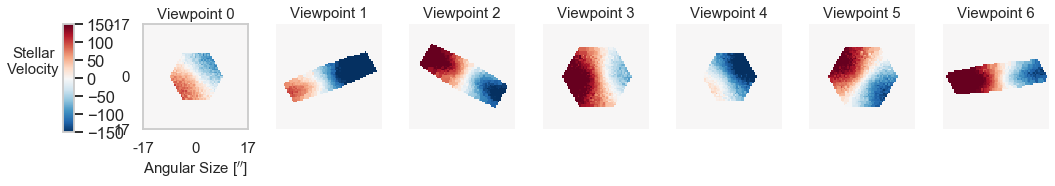

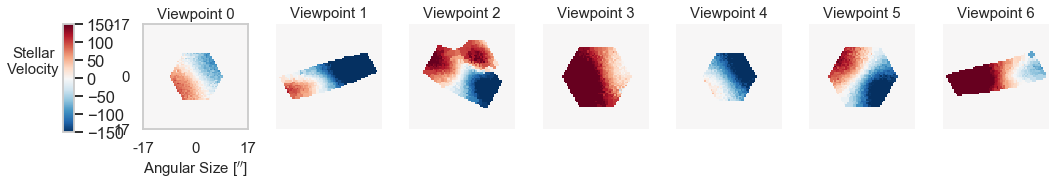

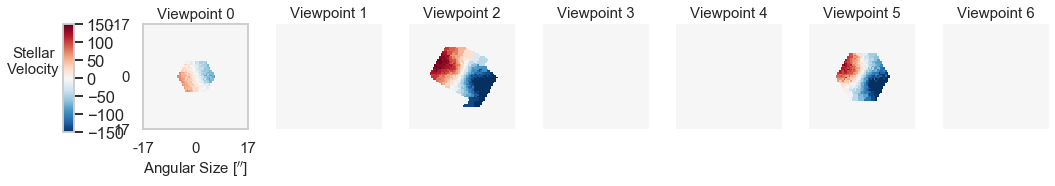

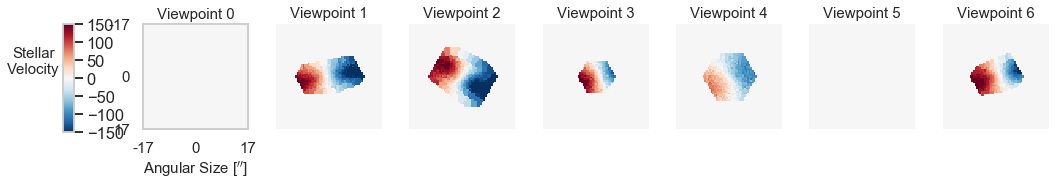

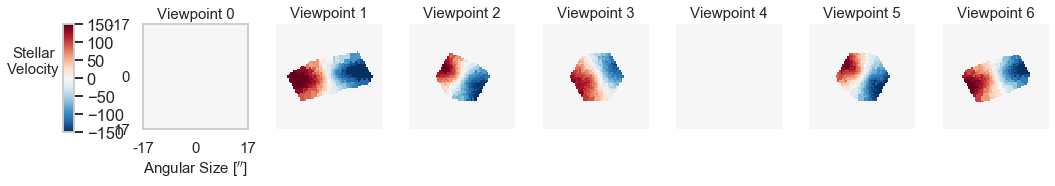

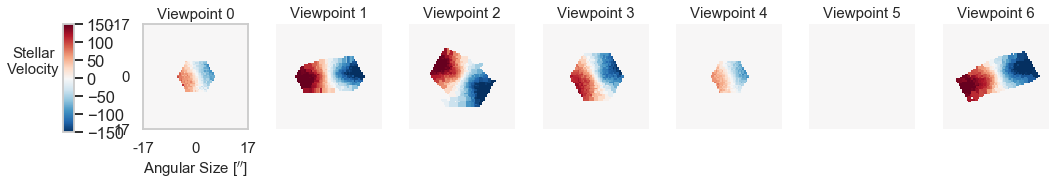

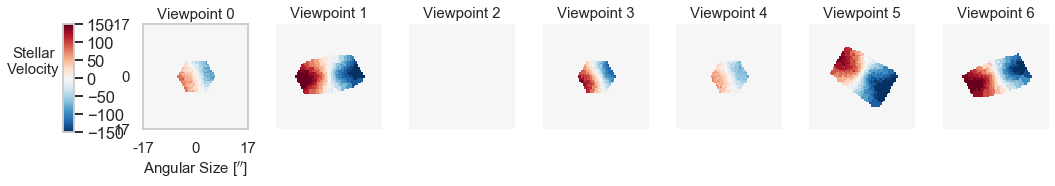

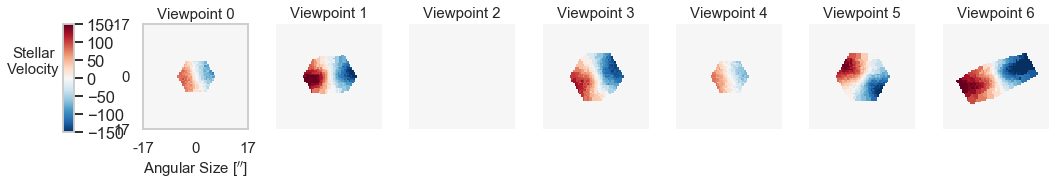

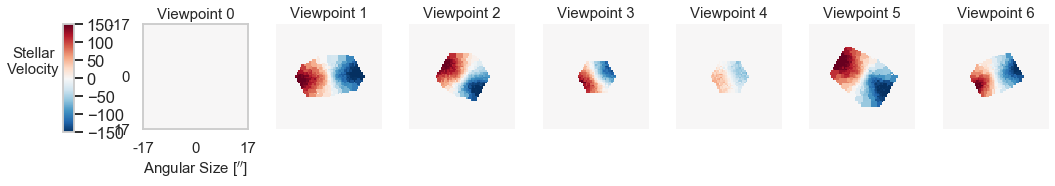

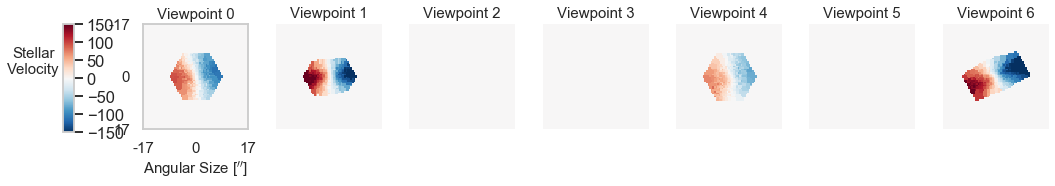

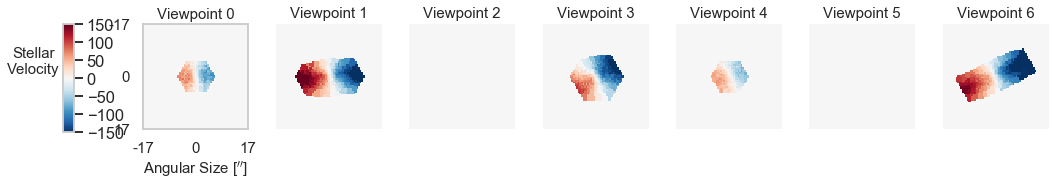

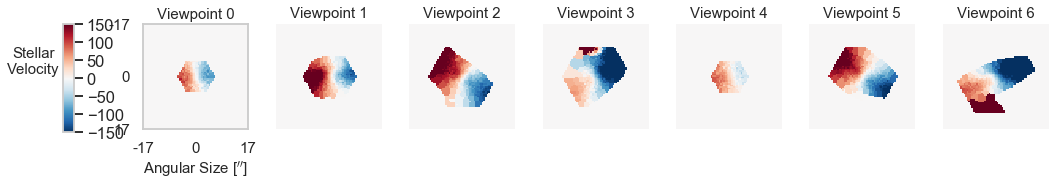

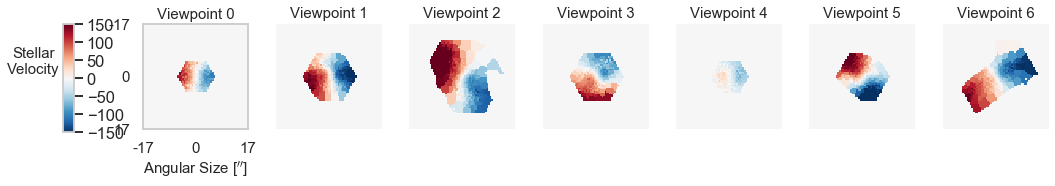

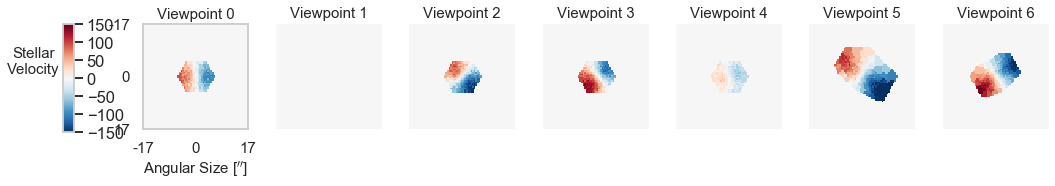

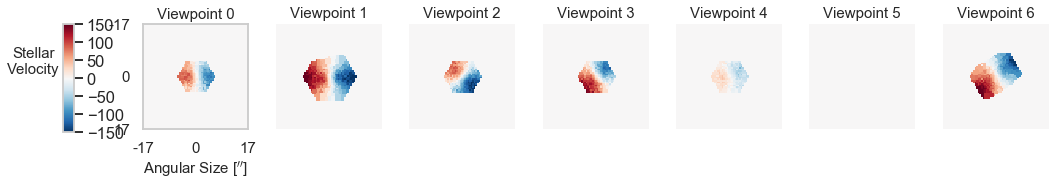

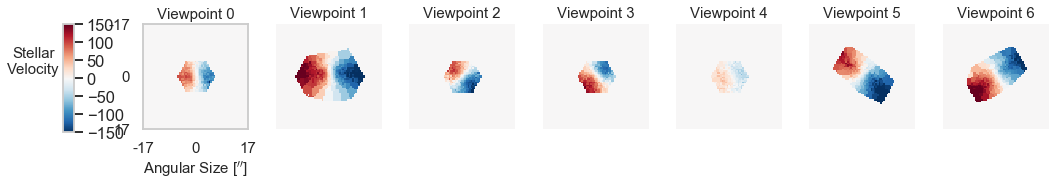

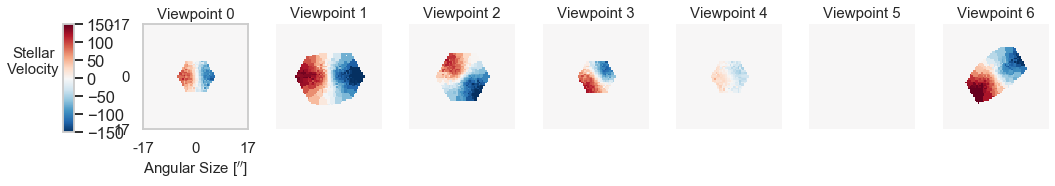

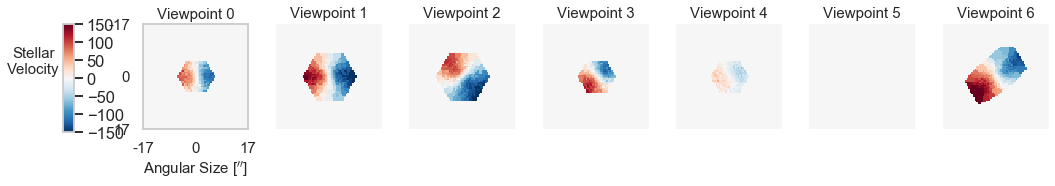

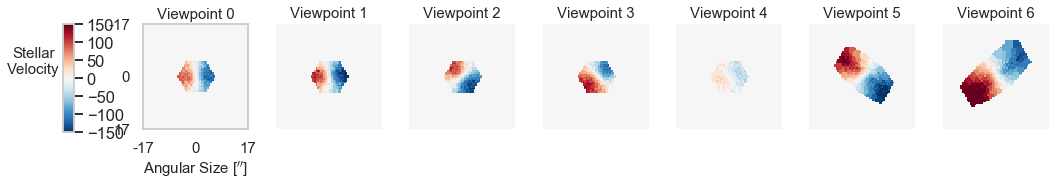

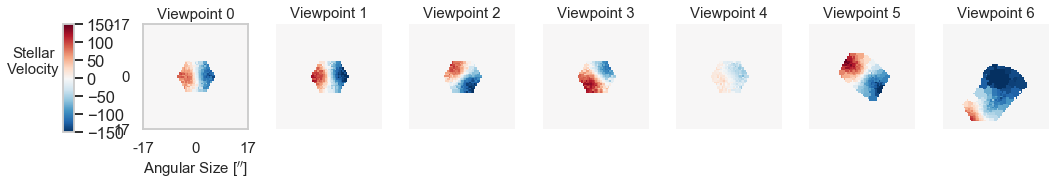

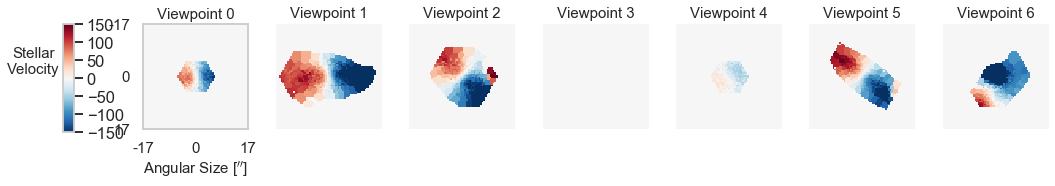

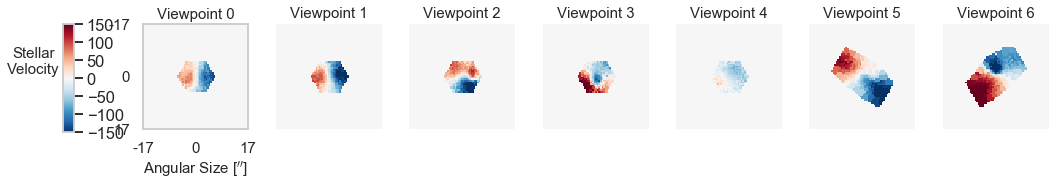

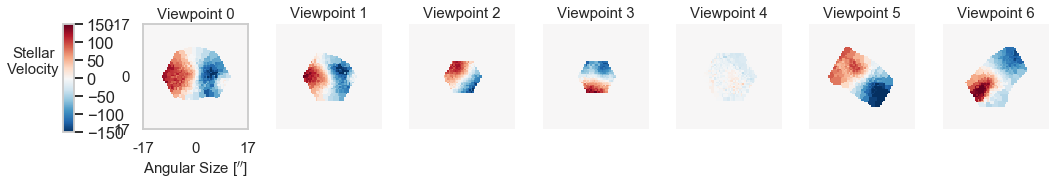

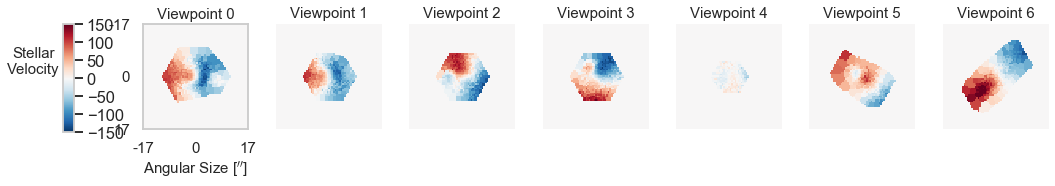

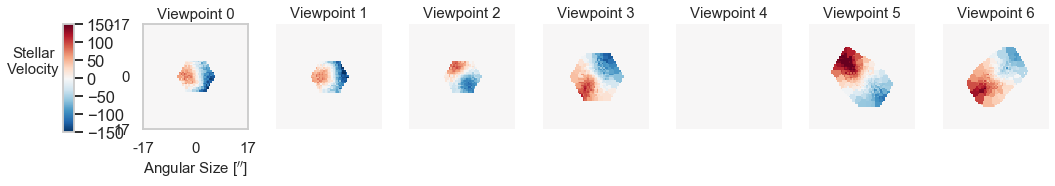

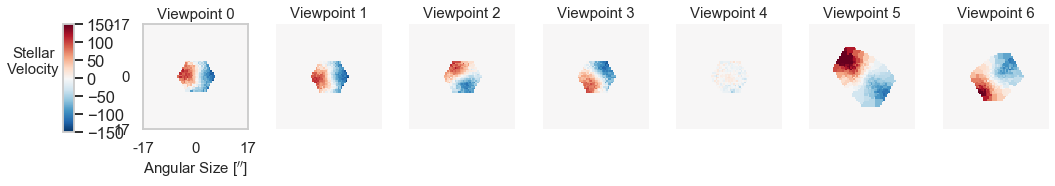

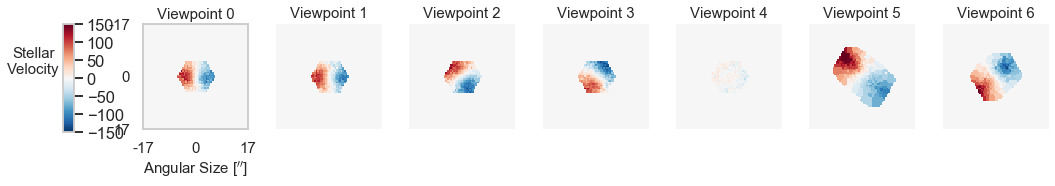

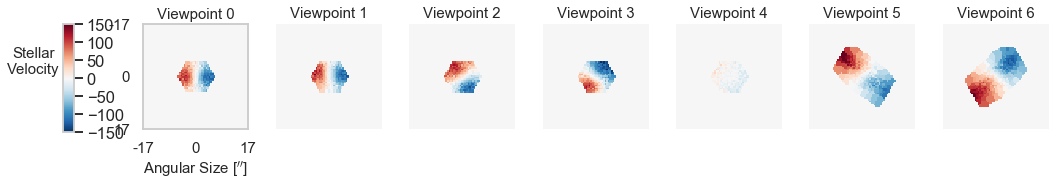

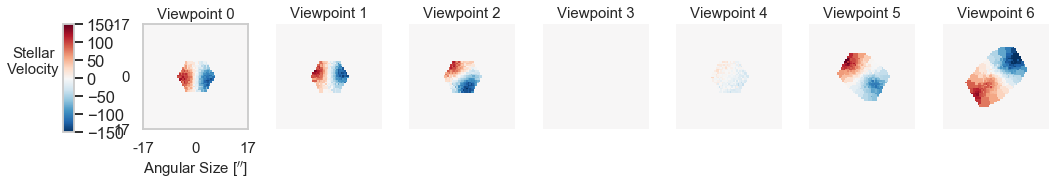

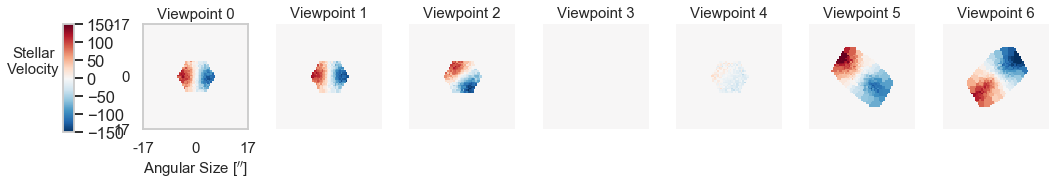

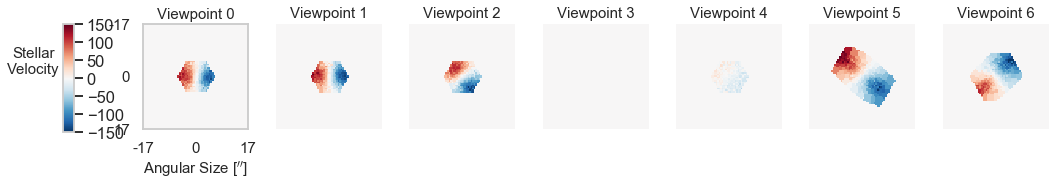

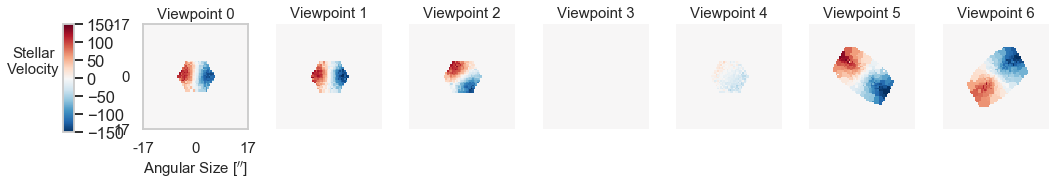

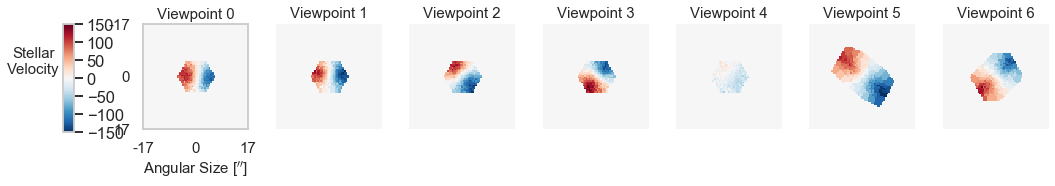

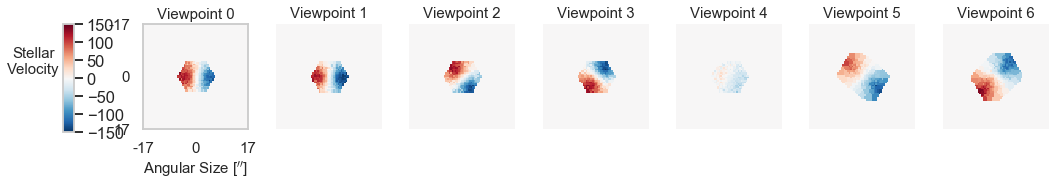

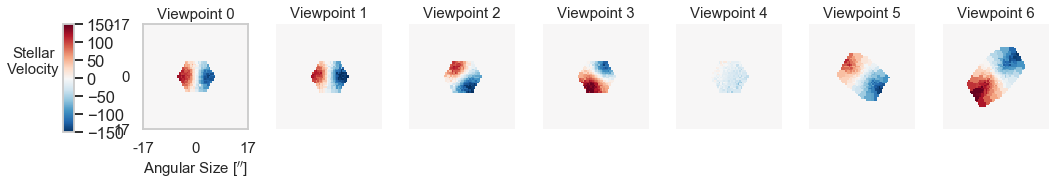

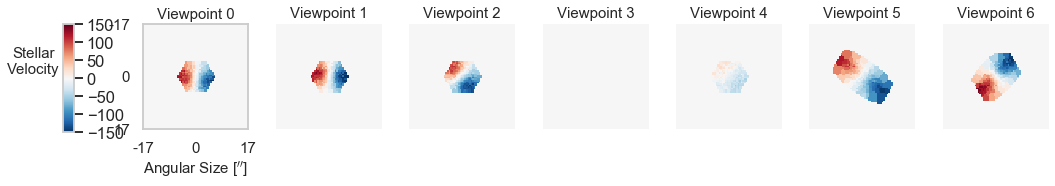

In [12]:
# This code creates all of the .png images, so I can only run it from my machine because it links to the
# kinematic cubes, which are somewhat large ('../kinematic_maps/kinematics...') and I don't want them
# on my Github

from astropy.io import fits
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
# Step to make velocity plots
myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320,    5,10,20,30,40,60,80,100,120,140,160]
# You are going to save these to your github page so that you can have an html link to them?
#myr = 210
#myr_list=[195,205,210]
#myr_list=[5,10,20,30,40,50,60,100,200]
#myr_list=[5, 10, 30, 50, 200]



#fg3_m15
myr_list=[5,60,90,120,150,180,210,240,270,300,320,340,360,380,400,420,440,460,480,500]

#fg3_m10_iso1:
myr_list=[5,30,60,90,100,120,150,180,200]

#fg3_m10:
myr_list=[5,40,60,100,200,300,400,410,420,600,640,700,800,840,900,940,980,1000,1020,1040,1060,1080,1100,1140,1145,1150,1155,1160,1165,1168]

#fg1_m13
myr_list=[5,10,20,30,40,50,60,200]#iso1
myr_list=[5,10,30,50,100,200]#iso0.333
myr_list=[10,40,50,60,70,90,120,130,140,
    145,150,155,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,260,270,280,290,300,310,
    320,330,340,350,410]

#fg3_m13
myr_list=[20,40,70,80,100,120,140,
    150,170,180,190,210,220,230,
    235,237,240,242,245,247,250,252,255,257,262,265,270,275,280,285,287,288,289,290,295,305]



run='fg3_m13'
run_file='fg3_m13'
view_list=[0,1,2,3,4,5,6]
degraded = 'degraded'

#myr_list=[170]


for i in range(len(myr_list)):
    myr = myr_list[i]
    fig, axs = plt.subplots(1,7, figsize=(15, 2.5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0, wspace=.2)

    axs = axs.ravel()
    for j in range(len(view_list)):
        view = view_list[j]
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            
        except FileNotFoundError:
            #could just be missing a viewpoint
            #so just construct a fake file
            fake = np.zeros((67,67))
            print('missing this viewpoint', j)
            if j ==0:
                im = axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            
                axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
                axs[j].tick_params(axis='both', which='major', labelsize=15)
                axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
                cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
                cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            else:
                axs[j].axis('off')
                axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
                axs[j].axis('off')
            axs[j].set_title('Viewpoint '+str(j), size=15)
            continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
        else:
            axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].axis('off')
        axs[j].set_title('Viewpoint '+str(j), size=15)
        #plt.colorbar(im)
    plt.tight_layout()
    plt.savefig(str(run_file)+'_panels_'+str(degraded)+'/velocity_panel_'+str(run)+'_'+str(myr)+'.png', dpi=1000, bbox_to_inches='tight')
    
    

In [31]:
# Okay so there are three main aspects that I'd like to see with this interactive fig - 

# First I'd like to display all plots for all viewpoints for a moment in time, and the real challenge
# is that I'd like to display these .png images below the main figure, not just as a hover tool feature

# Second, I'd like to be able to togle through the different mountain plots for each simulation
# (this doesn't seem too hard to do)

# Third, I'd like to display using some sort of a tap select or hover the LDA value at each moment in time
# on the top plot (this is done)

In [13]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Band
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import Title
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Circle, CustomJS
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
from bokeh.models import Span
from bokeh.models import Range1d
from bokeh.layouts import gridplot
from bokeh.models import HoverTool 

In [14]:
output_notebook()

Loading BokehJS ...

In [250]:
degraded='degraded'
output_file("mountin_degraded.html")
myr_list_names=[[40,60,80,100,
                 120,140,160,
                 170,180,185, 190, 195, 205, 210, 220, 225, 230, 240,  260,265],
                [40, 70, 80, 100, 120, 140, 150, 170, 180, 190, 210, 220, 230, 235, 
             237,240, 242, 245,  247, 250, 252, 255, 257, 262, 265, 270, 275, 280, 285,289],
              [40, 50, 60, 70, 90, 120, 130, 140, 145, 150, 155, 170, 175, 180,
    185, 190, 195, 200, 205,210, 215,  220,225,  230, 235, 240,245, 250,260, 270,
    280, 290, 300, 310, 320, 330],
               [60,90,120,150,180,210,240,270,300,
               320,340,360,380,400,420],
               [40,60,100,200,300,400,410,420,
               600,640,700,800,840,900,940,980]]
myr_list_names_late=[[275,285,295,305,311,315,320],
                     [290,295,305],
                    [340,350,410],
                    [440,460,480,500],
                    [1000,
               1020,1040,1060,1080,1100,1140,
                1145,1150,1155,1160,1165,1168]]
myr_list_names_early=[[5,10,20,30,40,50,60,100,200],
                     [5,10,20,30,40,50,60,100,200],
                     [5,10,20,30,40,50,60,100,200],
                     [5,30,60,90,100,120,150,180,200],
                     [5,30,60,90,100,120,150,180,200]]
title_list = [r'q = 0.5, fg = 0.3', r'q = 0.333, fg = 0.3',r'q = 0.333, fg = 0.1',
             r'q = 0.2, fg = 0.3, B/T = 0.2', r'q = 0.1, fg = 0.3, B/T = 0.2']
prefix_list = ['fg3_m12', 'fg3_m13', 'fg1_m13', 'fg3_m15', 'fg3_m10']
iso_prefix_1_list = ['fg3_m12_iso1', 'fg3_m12_iso1', 'fg1_m13_iso1','fg3_m10_iso1','fg3_m10_iso1']
iso_prefix_2_list = ['fg3_m12_iso0.5', '','fg1_m13_iso0.333','','']
tab_list = []
colors = [ "#F5634A","#FF9C5B",
        "#FAD089","#86CD82","#254E70"]
myr_list_of_lists_fn = []
myr_list_of_lists_fn_norm = []

view_list_of_lists_fn = []
myr_list_of_lists_fp = []
myr_list_of_lists_fp_norm = []
view_list_of_lists_fp = []

false_neg_term_list = []
false_neg_LDA_list = []

false_pos_term_list = []
false_pos_LDA_list = []
for h in range(len(title_list)):
    #h=h+1
    print('run', title_list[h])
    
    my_list_ind = my_list_LDA_list[h]
    my_list_ind_non_left = my_list_LDA_non_left_list[h]
    my_list_ind_non_right = my_list_LDA_non_right_list[h]
    
    sort_coef = significant_coef_list[h]
    
    sort_std = significant_std_list[h]
    sortedinput=significant_term_list[h]
    
    myr_list = myr_list_list[h]
    myr_list_sorted_left = myr_list_sorted_left_list[h]
    myr_list_sorted_right = myr_list_sorted_right_list[h]
    
    #~~~~~~
    myr_list_name = myr_list_names[h]
    
    if len(myr_list_name) != len(myr_list):
        print('run', title_list[h])
        for k in range(len(myr_list)):
            print(myr_list_name[k], myr_list[k])
        STOP
    
    myr_list_name_right = myr_list_names_late[h]
    myr_list_name_left = myr_list_names_early[h]
    
    
    #~~~~~~
    myr_here = myr_here_list[h]
    myr_here_non_left = myr_here_non_left_list[h]
    myr_here_non_right = myr_here_non_right_list[h]
    
    if len(myr_list_sorted_right) != len(myr_list_name_right) != len(myr_here_non_right):
        print('run', title_list[h])
        for k in range(len(myr_list_sorted_right)):
            print(myr_list_name_right[k], myr_list_sorted_right[k])
        STOP
    
    input_1_means = input_1_means_list[h]
    input_2_means = input_2_means_list[h]
    input_3_means = input_3_means_list[h]
    input_4_means = input_4_means_list[h]
    input_5_means = input_5_means_list[h]
    input_6_means = input_6_means_list[h]
    
    
    input_1_means_non = input_1_means_list_non[h]
    input_2_means_non = input_2_means_list_non[h]
    input_3_means_non = input_3_means_list_non[h]
    input_4_means_non = input_4_means_list_non[h]
    input_5_means_non = input_5_means_list_non[h]
    input_6_means_non = input_6_means_list_non[h]
    
    input_1_means_ind = input_1_means_list_ind[h]
    input_2_means_ind = input_2_means_list_ind[h]
    input_3_means_ind = input_3_means_list_ind[h]
    input_4_means_ind = input_4_means_list_ind[h]
    input_5_means_ind = input_5_means_list_ind[h]
    input_6_means_ind = input_6_means_list_ind[h]

    input_1_means_non_ind = input_1_means_list_non_ind[h]
    input_2_means_non_ind = input_2_means_list_non_ind[h]
    input_3_means_non_ind = input_3_means_list_non_ind[h]
    input_4_means_non_ind = input_4_means_list_non_ind[h]
    input_5_means_non_ind = input_5_means_list_non_ind[h]
    input_6_means_non_ind = input_6_means_list_non_ind[h]
    
    
    
    
    list_inter = list_inter_list[h]
    new_min_index = new_min_index_list[h]
    
    new_means = new_means_list[h]
    std = std_list[h]
    
    iso_prefix_1 = iso_prefix_1_list[h]
    iso_prefix_2 = iso_prefix_2_list[h]
    prefix = prefix_list[h]
    mean_non = mean_non_list[h]
    
    coalescence = coalescence_list[h]
    early = early_list[h]
    
    new_means_non_left = new_means_non_left_list[h]
    std_non_left = std_non_left_list[h]
    
    new_means_non_right = new_means_non_right_list[h]
    std_non_right = std_non_right_list[h]
    

    LDA_act = []
    LDA_l = []
    up = []
    low = []
    img_list = []
    img_disp_list = []

    

    # Okay but the trick is that for the early-stage isolated galaxies they are a combination
    # of two different merger simulations AND the early-stage (pre-pericentric passage) mergers
    # So you'll need to show multiple maps
    # 5,10,20,30 from the merger
    # #myr_list=[5,10,20,30,40,50,60,100,200] from iso1
    #myr_list=[5, 10, 30, 50, 200] from iso0.5


    myr_list_sorted = sorted(myr_list)
    myr_list_names_sorted = sorted(myr_list_name)
    
    
    #myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
    #myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320]

    false_neg_myr = []
    false_neg_view = []
    false_neg_LDA = []
    false_neg_term = []
    print('sort_coef', sort_coef)

    for j in range(len(myr_here)):
        LDA_act.append(str(round(sort_coef[-1]*input_1_means[j],1))+' + '+str(round(sort_coef[-2]*input_2_means[j],1))+' + '+str(round(sort_coef[-3]*input_3_means[j],1))+' + '+str(round(sort_coef[-4]*input_4_means[j],1))+' + '+str(round(sort_coef[-5]*input_5_means[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        LDA_l.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + '+str(round(sort_coef[-4],1))+' '+sortedinput[-4]+' + '+str(round(sort_coef[-5],1))+' '+sortedinput[-5]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        up.append(new_means[j]+std[j])
        low.append(new_means[j]-std[j])
        img_list.append('https://github.com/beckynevin/interactive_figs/blob/master/'+prefix+'_panels_degraded/velocity_panel_'+prefix+'_'+str(myr_list_names_sorted[j])+'.png?raw=true')
        for q in range(7):#check all viewpoints
            #input_1[myr[k]][z]
            LDA_val = my_list_ind[myr_here[j]][q]
            #sort_coef[-1]*input_1_means_ind[myr_here[j]][q]+sort_coef[-2]*input_2_means_ind[myr_here[j]][q]+sort_coef[-3]*input_3_means_ind[myr_here[j]][q]+sort_coef[-4]*input_4_means_ind[myr_here[j]][q]+sort_coef[-5]*input_5_means_ind[myr_here[j]][q]+list_inter[new_min_index][0]
            
            if LDA_val < mean_non and input_1_means_ind[myr_here[j]][q]!= 888:
                #if h==1:
                term_array = [sort_coef[-1]*input_1_means_ind[myr_here[j]][q],sort_coef[-2]*input_2_means_ind[myr_here[j]][q],
                             sort_coef[-3]*input_3_means_ind[myr_here[j]][q],sort_coef[-4]*input_4_means_ind[myr_here[j]][q],
                             sort_coef[-5]*input_5_means_ind[myr_here[j]][q]]
                coef_array =  [sortedinput[-1],sortedinput[-2],
                               sortedinput[-3],sortedinput[-4],
                               sortedinput[-5]]
                false_neg_myr.append(myr_list_names[h][j])
                false_neg_view.append(q)
                false_neg_LDA.append(LDA_val)
                # okay find the term that is contributing the most
                choice = coef_array[np.argmin(term_array)]
                false_neg_term.append(choice)
                
            #mean_non
    
    
    
    
    false_pos_myr = []
    false_pos_view = []
    false_pos_LDA = []
    false_pos_term = []
    
    
    up_left=[]
    low_left=[]
    LDA_act_left=[]
    LDA_l_left=[]
    img_disp_list_left=[]
    img_list_left=[]
    img_list_left_alt=[]
    img_list_left_alt_2=[]
    for j in range(len(myr_here_non_left)):
        LDA_act_left.append(str(round(sort_coef[-1]*input_1_means_non[j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        LDA_l_left.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        up_left.append(new_means_non_left[j]+std_non_left[j])
        low_left.append(new_means_non_left[j]-std_non_left[j])
        if myr_list_sorted_left[j]<40:
            try:
                img_list_left.append('https://github.com/beckynevin/interactive_figs/blob/master/'+prefix+'_panels_degraded/velocity_panel_'+prefix+'_'+str(myr_list_name_left[j])+'.png?raw=true')
            except:
                img_list_left.append('')
        else:
            img_list_left.append('')
        try:
            img_list_left_alt.append('https://github.com/beckynevin/interactive_figs/blob/master/'+iso_prefix_1+'_rotated_panels_degraded/velocity_panel_'+iso_prefix_1+'_rotated_'+str(myr_list_name_left[j])+'.png?raw=true')
        except:
            img_list_left_alt.append('')
        try:
            img_list_left_alt_2.append('https://github.com/beckynevin/interactive_figs/blob/master/'+iso_prefix_2+'_rotated_panels_degraded/velocity_panel_'+iso_prefix_2+'_rotated_'+str(myr_list_name_left[j])+'.png?raw=true')
        except:
            img_list_left_alt_2.append('')
        for q in range(7):#check all viewpoints
            #input_1[myr[k]][z]
            try:
                LDA_val = my_list_ind_non_left[myr_here_non_left[j]][q]
                #sort_coef[-1]*input_1_means_non_ind[myr_here_non_left[j]][q]+sort_coef[-2]*input_2_means_non_ind[myr_here_non_left[j]][q]+sort_coef[-3]*input_3_means_non_ind[myr_here_non_left[j]][q]+list_inter[new_min_index][0]
            except:
                STOP
                
            if LDA_val > mean_non and LDA_val != 888:#input_1_means_non_ind[myr_here_non_left[j]][q]!= 888:
                false_pos_myr.append(myr_list_names_early[h][j])
                false_pos_view.append(q)
                
                term_array = [sort_coef[-1]*input_1_means_non_ind[myr_here_non_left[j]][q],
                              sort_coef[-2]*input_2_means_non_ind[myr_here_non_left[j]][q],
                             sort_coef[-3]*input_3_means_non_ind[myr_here_non_left[j]][q],
                              sort_coef[-4]*input_4_means_non_ind[myr_here_non_left[j]][q],
                             sort_coef[-5]*input_5_means_non_ind[myr_here_non_left[j]][q]]
                coef_array =  [sortedinput[-1],sortedinput[-2],
                               sortedinput[-3],sortedinput[-4],
                               sortedinput[-5]]
                false_pos_LDA.append(LDA_val)
                # okay find the term that is contributing the most
                choice = coef_array[np.argmax(term_array)]
                false_pos_term.append(choice)
            #mean_non
    
    


    up_right=[]
    low_right=[]
    LDA_act_right=[]
    LDA_l_right=[]
    img_disp_list_right=[]
    img_list_right=[]
    for j in range(len(myr_here_non_right)):#myr_list_sorted_right
        try:
            LDA_act_right.append(str(round(sort_coef[-1]*input_1_means_non[len(myr_here_non_right):][j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[len(myr_here_non_right):][j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[len(myr_here_non_right):][j],1))++' + '+str(round(sort_coef[-4]*input_4_means_non[len(myr_here_non_right):][j],1))+' + '+str(round(sort_coef[-5]*input_5_means_non[len(myr_here_non_right):][j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        except:
            print(len(input_1_means_non), len(myr_here_non_right))
        LDA_l_right.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + '+str(round(sort_coef[-4],1))+' '+sortedinput[-4]+' + '+str(round(sort_coef[-5],1))+' '+sortedinput[-5]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        up_right.append(new_means_non_right[j]+std_non_right[j])
        low_right.append(new_means_non_right[j]-std_non_right[j])
        img_list_right.append('https://github.com/beckynevin/interactive_figs/blob/master/'+prefix+'_panels_degraded/velocity_panel_'+prefix+'_'+str(myr_list_name_right[j])+'.png?raw=true')

        for q in range(7):#check all viewpoints
            #input_1[myr[k]][z]
            try:
                LDA_val = my_list_ind_non_right[myr_here_non_right[j]][q]
                #sort_coef[-1]*input_1_means_non_ind[myr_here_non_right[j]][q]+sort_coef[-2]*input_2_means_non_ind[myr_here_non_right[j]][q]+sort_coef[-3]*input_3_means_non_ind[myr_here_non_right[j]][q]+list_inter[new_min_index][0]
            except:
                STOP
                
            if LDA_val > mean_non and LDA_val!= 888:#input_1_means_non_ind[myr_here_non_right[j]][q]!= 888:
                false_pos_myr.append(myr_list_names_late[h][j])
                false_pos_view.append(q)
                term_array = [sort_coef[-1]*input_1_means_non_ind[myr_here_non_right[j]][q],
                              sort_coef[-2]*input_2_means_non_ind[myr_here_non_right[j]][q],
                             sort_coef[-3]*input_3_means_non_ind[myr_here_non_right[j]][q],
                              sort_coef[-4]*input_4_means_non_ind[myr_here_non_right[j]][q],
                             sort_coef[-5]*input_5_means_non_ind[myr_here_non_right[j]][q]]
                coef_array =  [sortedinput[-1],sortedinput[-2],
                               sortedinput[-3],sortedinput[-4],
                               sortedinput[-5]]
                false_pos_LDA.append(LDA_val)
                # okay find the term that is contributing the most
                choice = coef_array[np.argmax(term_array)]
                false_pos_term.append(choice)
        
                
                
            #mean_non
    
    print('run', title_list[h])
    print('lists false positivo')
    print(false_pos_myr)
    print(false_pos_view)
    
    myr_list_of_lists_fp.append(false_pos_myr)
    myr_list_of_lists_fp_norm.append(false_pos_myr/np.array(myr_list_name_right)[-1])
    view_list_of_lists_fp.append(false_pos_view)
    
    myr_list_of_lists_fn.append(false_neg_myr)
    myr_list_of_lists_fn_norm.append(false_neg_myr/np.array(myr_list_name_right)[-1])
    view_list_of_lists_fn.append(false_neg_view)
    
    false_neg_term_list.append(false_neg_term)
    false_neg_LDA_list.append(false_neg_LDA)
    
    false_pos_term_list.append(false_pos_term)
    false_pos_LDA_list.append(false_pos_LDA)
   
    source = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted,
        x=myr_here,
        y=new_means,
        upper=up,
        lower=low,
        desc=myr_here,
        LDA_list=LDA_l,
        LDA_actual=LDA_act,
        imgs=img_list))

    source1 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_left,
        x1=myr_here_non_left,
        y1=new_means_non_left,
        upper_l = up_left,
        lower_l = low_left,
        desc=myr_here_non_left,
        LDA_list_left=LDA_l_left,
        LDA_actual_left=LDA_act_left,
        imgs_left=img_list_left,
        imgs_left_alt = img_list_left_alt,
        imgs_left_alt_2 = img_list_left_alt_2))

    source2 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_right,
        x2=myr_here_non_right,
        y2=new_means_non_right,
        upper_r = up_right,
        lower_r = low_right,
        desc=myr_here_non_right,
        LDA_list_right=LDA_l_right,
        LDA_actual_right=LDA_act_right,
        imgs_right=img_list_right))

    TOOLTIPS = """
        <div>

                <img
                    src="@imgs" height="120" alt="@imgs" width="700"
                    style="float: center; margin: 0px 15px 15px 0px;"
                ></img>

            <div>
                <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list</span>
            </div>
            <div>
            <span style="font-size: 17px; font-weight: bold;">@y = @LDA_actual</span>
            </div>


        </div>
    """

    TOOLTIPS1 = """
        <div>

                <img
                    src="@imgs_left" height="120" alt="@imgs_left" width="700"
                    style="float: center; margin: 0px 0px 0px 0px;"
                ></img>

            <div>
            <img
                    src="@imgs_left_alt" height="120" alt="@imgs_left_alt" width="700"
                    style="float: center; margin: 0px 0px 0px 0px;"
                ></img>
            <div>
            <img
                    src="@imgs_left_alt_2" height="120" alt="@imgs_left_alt_2" width="700"
                    style="float: center; margin: 0px 0px 0px 0px;"
                ></img>
            <div>
                <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_left</span>
            </div>
            <div>
            <span style="font-size: 17px; font-weight: bold;">@y1 = @LDA_actual_left</span>
            </div>

        </div>
    """

    TOOLTIPS2 = """
        <div>

                <img
                    src="@imgs_right" height="120" alt="@imgs_right" width="700"
                    style="float: center; margin: 0px 15px 15px 0px;"
                ></img>

            <div>
                <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_right</span>
            </div>
            <div>
            <span style="font-size: 17px; font-weight: bold;">@y2 = @LDA_actual_right</span>
            </div>

        </div>
    """


    p = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd')#, tooltips=TOOLTIPS)
    #p = figure(tools="wheel_zoom,reset", match_aspect=True, )
    p.xgrid[0].grid_line_color=None
    p.ygrid[0].grid_line_alpha=0.5

    # Vertical line
    vline1 = Span(location=early, dimension='height', line_color='black', line_width=2,line_dash='dashed')
    vline2 = Span(location=coalescence, dimension='height', line_color='black', line_width=2,line_dash='dashed')
    vline3 = Span(location=coalescence+0.5, dimension='height', line_color='black', line_width=2,line_dash='dashed')

    # Horizontal line
    hline = Span(location=mean_non, dimension='width', line_color='black', line_width=2)

    p.renderers.extend([vline1, vline2, vline3, hline])


    p.line('x', 'y', color=colors[h], source=source, line_width=10)#, legend_label='Merger')

    #r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha = 0.05, size=7)#, legend_label='Merger',source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
    #r0_visible = Circle(x='x', y='y', fill_color='red', size=7, fill_alpha=0.5)#,source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
    #r0 = p.add_glyph(source, r0_invisible, selection_glyph = r0_visible, nonselection_glyph=r0_invisible)
    r0 = p.circle(x='x', y='y', fill_color=colors[h], line_color='black',fill_alpha=0.5,size=12, source=source)#, legend_label='Merger')#was p.circle

    #r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None,  size=7)

    #p.add_tools(HoverTool(renderers=[r0], tooltips=TOOLTIPS, renderers=[cr]))




    #invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
    #visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
    #cr = p.add_glyph(source, r0_invisible, selection_glyph=r0, nonselection_glyph=r0_invisible)

    # Add a hover tool, that selects the circle
    #code = "var indices = cb_data.renderer.data_source.inspected['1d'].indices;" 
    #"source.set('selected', cb_data['index']);"

    #var indices = cb_data.renderer.data_source.inspected['1d'].indices;
    #callback = CustomJS(args={'source': source}, code=code)
    p.add_tools(HoverTool(tooltips=TOOLTIPS,  renderers=[r0]))#, mode='hline'))







    p.xgrid.grid_line_color=None
    p.ygrid.grid_line_alpha=0.5

    band = Band(base='x', lower='lower', upper='upper', source = source ,level='underlay',
                fill_alpha=0.5, line_width=0, fill_color=colors[h])
    p.add_layout(band)


    p.line('x1', 'y1', color=blue, source=source1, line_width=10)#, legend_label='Nonmerger')
    r1 = p.circle('x1','y1', fill_color=blue, line_color='black', size=12, source=source1,  fill_alpha=0.5)#legend_label='Nonmerger',
    band = Band(base='x1', lower='lower_l', upper='upper_l', source = source1 ,level='underlay',
                fill_alpha=0.5, line_width=0, fill_color=blue)
    p.add_layout(band)

    p.add_tools(HoverTool(renderers=[r1], tooltips=TOOLTIPS1))


    p.line('x2','y2', color=blue, source=source2, line_width=10)
    r2 = p.circle('x2','y2',  line_color='black', size=12, source=source2, fill_color=blue, fill_alpha=0.5)#, nonselection_line_color="", nonselection_line_alpha=1.0)


    band = Band(base='x2', lower='lower_r', upper='upper_r', source = source2 ,level='underlay',
                fill_alpha=0.5, line_width=0, fill_color=blue)
    p.add_layout(band)

    p.add_tools(HoverTool(renderers=[r2], tooltips=TOOLTIPS2))
    #axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 

    ymax =  max(new_means+std)
    ymin = min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right))

    #p.x_range=Range1d(min(myr_here_non_left), max(myr_here_non_right))
    p.y_range=Range1d(min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right)), max(new_means+std))


    #labels = LabelSet(x='x', y='y', text='x', level='glyph',
    #              x_offset=5, y_offset=5, source=source, render_mode='canvas')

    peri = Label(x=myr_here[0], y=mean_non, x_units='data', y_units='data',
                     text='First Pericentric Passage', render_mode='css',
                     border_line_color='black', border_line_alpha=0.0,
                     background_fill_color='white', background_fill_alpha=0.0)
    coal = Label(x=coalescence+0.03, y=mean_non, x_units='data', y_units='data',
                     text='Coalescence', render_mode='css',
                     border_line_color='black', border_line_alpha=0.0,
                     background_fill_color='white', background_fill_alpha=0.0)

    # Now all the merger stages labels, maybe place them down below?
    PC = Label(x=coalescence+0.03, y=ymax-(ymax-ymin)/13, x_units='data', y_units='data',
                     text='Post-Coalescence', render_mode='css',
                     border_line_color='black', border_line_alpha=0.20,
                     background_fill_color=colors[h], background_fill_alpha=0.4)

    L = Label(x=early+0.1, y=ymax-(ymax-ymin)/13, x_units='data', y_units='data',
                     text='Late', render_mode='css',
                     border_line_color='black', border_line_alpha=0.3,
                     background_fill_color=colors[h], background_fill_alpha=0.4)

    E = Label(x=early-0.3, y=ymax-(ymax-ymin)/13, x_units='data', y_units='data',
                     text='Early', render_mode='css',
                     border_line_color='black', border_line_alpha=0.3,
                     background_fill_color=colors[h], background_fill_alpha=0.4)

    
    p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                       x_start=myr_here[0]+0.1, y_start=mean_non, x_end=myr_here[0], y_end=new_means[0]+0.2))
    p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                       x_start=coalescence+0.1, y_start=mean_non, x_end=coalescence, y_end=new_means[np.where(myr_here==coalescence)][0]+0.2))
    p.add_layout(Title(text="Merger Timeline [Gyr]", align="center"), "below")
    p.add_layout(Title(text="LD1", align="center"), "left")

    #p.add_layout(labels)
    p.add_layout(peri)
    p.add_layout(coal)
    p.add_layout(PC)
    p.add_layout(E)
    p.add_layout(L)

    empty = figure(plot_width=1300, plot_height=400,background_fill_color='white',x_range=(0,1), y_range=(0,1))
    empty.image_url(url='imgs', x=0, y=1, w=0.9, h=0.5, source=source)
    #empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_@myr_name_list.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)


    #div_image = empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_10.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)

    #def update(pokemon_number=10):
    #    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
    #    push_notebook()


    #interact(update, pokemon_number=myr_here)
    empty.xgrid[0].grid_line_color=None
    empty.ygrid[0].grid_line_alpha=0.0
    empty.axis.visible = False






    p1 = gridplot([p], ncols=1)

    tab = Panel(child=p1, title=title_list[h])
    tab_list.append(tab)
tabs = Tabs(tabs=tab_list)


'''show(tabs, notebook_handle=True)

interact(update, pokemon_number=[10, 40, 70])'''

show(tabs) # show the results




run q = 0.5, fg = 0.3
sort_coef [-0.43848598419482315, 0.6741327813910705, 0.6803573806059845, 0.8435687778217904, -1.0893713531155877]
16 7
16 7
16 7
16 7
16 7
16 7
16 7
run q = 0.5, fg = 0.3
lists false positivo
[10, 275, 275, 275, 275, 275, 275, 285, 285, 285, 285, 285, 285, 295, 295, 295, 295, 305, 305, 305, 305, 305, 305, 311, 311, 311, 311, 311, 315, 315, 315, 315, 315, 320, 320, 320, 320, 320]
[2, 0, 1, 2, 4, 5, 6, 1, 2, 3, 4, 5, 6, 0, 3, 5, 6, 0, 2, 3, 4, 5, 6, 0, 1, 3, 5, 6, 0, 1, 2, 3, 6, 0, 2, 3, 5, 6]
run q = 0.333, fg = 0.3
sort_coef [-0.5503680362661723, -0.7169477396217526, 0.9475515078916775, 0.9478420889271346, -1.3174867762668065, 1.5160500580474192, -2.046568497161395, -2.1445865944149594, 2.4503828433893626, -2.8047074498295066, -4.17081740124896, 4.206893431034252, 5.564457859411077]
12 3
12 3
12 3
run q = 0.333, fg = 0.3
lists false positivo
[200, 290, 290, 290, 290, 290, 290, 295, 295, 295, 295, 295, 305, 305, 305, 305]
[5, 0, 1, 2, 3, 5, 6, 1, 2, 3, 5, 6, 0, 4, 

terms responsible [['resids', 'lambda_r', 'lambda_r', 'lambda_r', 'lambda_r', 'epsilon', 'resids', 'lambda_r', 'epsilon', 'lambda_r', 'lambda_r', 'resids', 'lambda_r', 'lambda_r', 'lambda_r', 'lambda_r', 'epsilon', 'epsilon', 'resids', 'lambda_r', 'epsilon', 'lambda_r', 'lambda_r', 'dPA*epsilon', 'resids', 'lambda_r', 'epsilon', 'lambda_r', 'lambda_r', 'epsilon', 'lambda_r', 'lambda_r', 'lambda_r', 'epsilon', 'Delta PA', 'Delta PA'], ['epsilon', 'epsilon', 'resids', 'Delta PA', 'Delta PA', 'epsilon', 'Delta PA', 'Delta PA', 'resids*epsilon', 'Delta PA', 'resids*epsilon', 'epsilon', 'dPA*sa', 'Delta PA', 'resids*epsilon', 'dPA*sa', 'epsilon', 'Delta PA', 'epsilon', 'epsilon', 'epsilon', 'epsilon', 'Delta PA', 'dPA*sa'], ['lambda_r', 'lambda_r', 'lambda_r', 'lambda_r', 'lambda_r', 'lambda_r', 'resids*lambdar', 'resids', 'resids', 'v_asym', 'v_asym', 'v_asym', 'v_asym'], ['sa*lambdar', 'sa*lambdar', 'sa*lambdar', 'sa*lambdar', 'va*lambdar', 'sa*lambdar', 'sa*lambdar', 'sa*lambdar', 'sa*ep

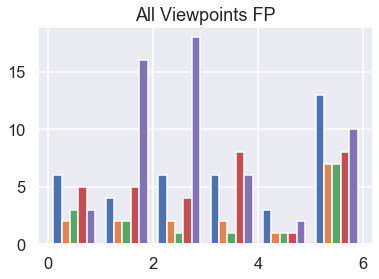

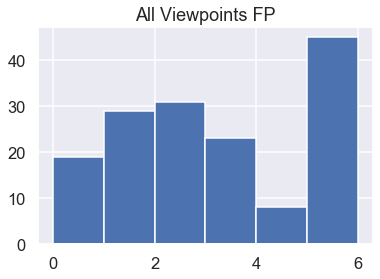

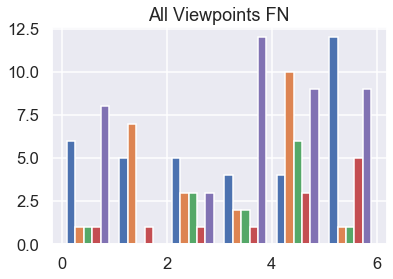

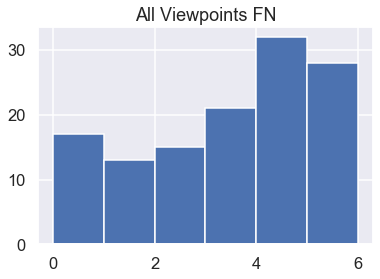

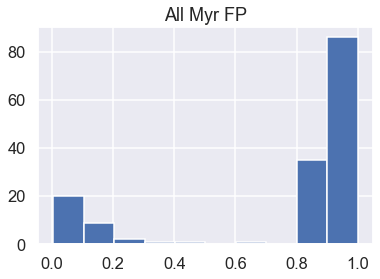

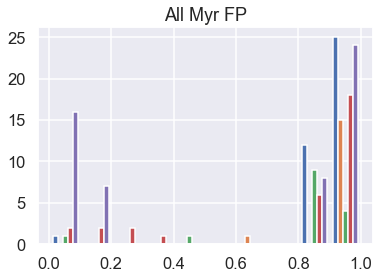

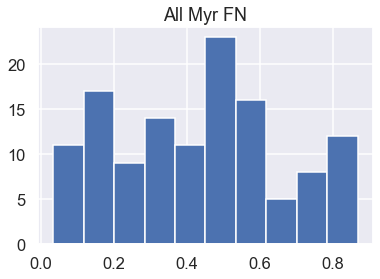

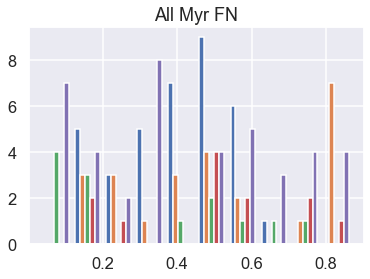

false negatives [40, 40, 40, 70, 80, 80, 100, 120, 120, 120, 140, 140, 150, 150, 180, 180, 235, 240, 240, 242, 245, 247, 250, 265]
len fp 174 len fn 247


In [257]:
# Doing a better job of quantifying this
#myr_list_of_lists_fp.append([false_pos_myr])
#view_list_of_lists_fp.append([false_pos_view])
print('terms responsible', false_neg_term_list)
print('terms responsible', false_pos_term_list)

print(type(view_list_of_lists_fp))
all_view_fp = []

for j in range(np.shape(view_list_of_lists_fp)[0]):
    #print(view_list_of_lists_fp[j])
    for i in range(len(view_list_of_lists_fp[j])):
        all_view_fp.append(view_list_of_lists_fp[j][i])
all_view_fn = []

for j in range(np.shape(view_list_of_lists_fn)[0]):
    #print(view_list_of_lists_fp[j])
    for i in range(len(view_list_of_lists_fn[j])):
        all_view_fn.append(view_list_of_lists_fn[j][i])
        
        
all_myr_fp = []

for j in range(np.shape(myr_list_of_lists_fp)[0]):
    #print(view_list_of_lists_fp[j])
    for i in range(len(myr_list_of_lists_fp[j])):
        all_myr_fp.append(myr_list_of_lists_fp_norm[j][i])

all_myr_fn = []

for j in range(np.shape(myr_list_of_lists_fn)[0]):
    #print(view_list_of_lists_fp[j])
    for i in range(len(myr_list_of_lists_fn[j])):
        all_myr_fn.append(myr_list_of_lists_fn_norm[j][i])

        

plt.clf()
plt.hist(view_list_of_lists_fp,bins=[0,1,2,3,4,5,6])
plt.title('All Viewpoints FP')
plt.show()

plt.clf()
plt.hist(all_view_fp,bins=[0,1,2,3,4,5,6])
plt.title('All Viewpoints FP')
plt.show()

plt.clf()
plt.hist(view_list_of_lists_fn,bins=[0,1,2,3,4,5,6])
plt.title('All Viewpoints FN')
plt.show()

plt.clf()
plt.hist(all_view_fn,bins=[0,1,2,3,4,5,6])
plt.title('All Viewpoints FN')
plt.show()

plt.clf()
plt.hist(all_myr_fp)
plt.title('All Myr FP')
plt.show()

plt.clf()
plt.hist(myr_list_of_lists_fp_norm)
plt.title('All Myr FP')
plt.show()
plt.clf()
plt.hist(all_myr_fn)
plt.title('All Myr FN')
plt.show()

plt.clf()
plt.hist(myr_list_of_lists_fn_norm)
plt.title('All Myr FN')
plt.show()

print('false negatives', myr_list_of_lists_fn[1])
print('len fp', len(all_views_fp), 'len fn', len(all_views_fn))

len fn 41 len FP 55
this is the myr 5
this is the view 1
this is the myr 5
this is the view 2
this is the myr 5
this is the view 3
this is the myr 30
this is the view 1
this is the myr 30
this is the view 2
this is the myr 30
this is the view 3
this is the myr 60
this is the view 1
this is the myr 60
this is the view 2
this is the myr 90
this is the view 1
this is the myr 90
this is the view 2
this is the myr 100
this is the view 0
this is the myr 100
this is the view 1
this is the myr 100
this is the view 2
this is the myr 120
this is the view 0
this is the myr 120
this is the view 2
this is the myr 120
this is the view 3
this is the myr 150
this is the view 2
this is the myr 180
this is the view 1
this is the myr 180
this is the view 2
this is the myr 180
this is the view 3
this is the myr 200
this is the view 1
this is the myr 200
this is the view 2
this is the myr 200
this is the view 5
this is the myr 1000
this is the view 1
this is the myr 1000
this is the view 5
this is the myr 

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

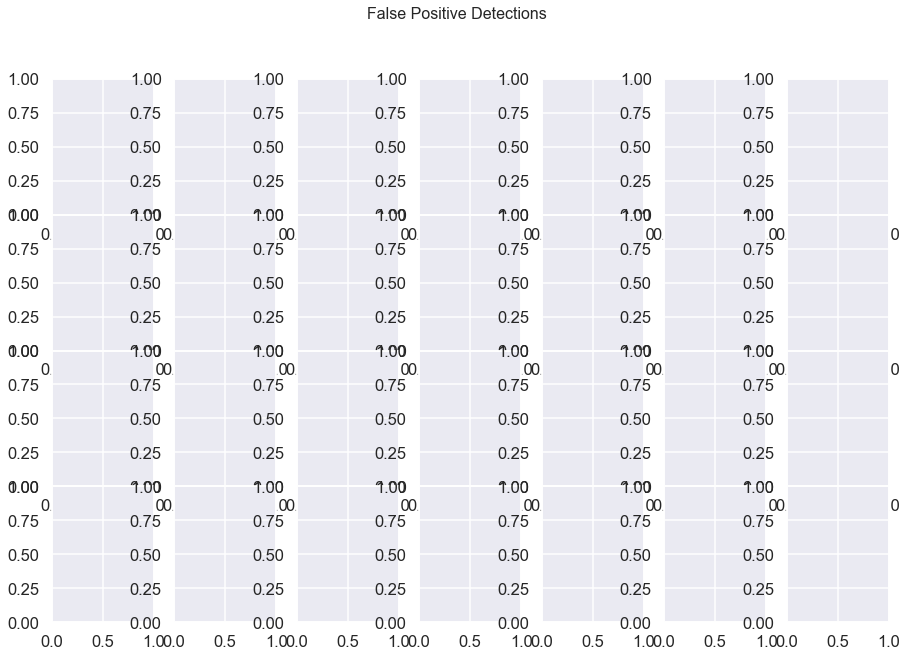

In [256]:


run_list = ['fg3_m12','fg3_m13','fg1_m13','fg3_m15','fg3_m10']
run_iso1_list = ['fg3_m12_iso1_rotated','fg3_m12_iso1_rotated','fg1_m13_iso1_rotated','fg3_m10_iso1_rotated','fg3_m10_iso1_rotated']
run_iso2_list = ['fg3_m12_iso0.5_rotated','','fg1_m13_iso0.333_rotated','','']
#myr_list_of_lists_fp

index = 4

run = run_list[index]
run_iso1 = run_iso1_list[index]
run_iso2 = run_iso2_list[index]
myr_list_fn = myr_list_of_lists_fn[index]
myr_list_fp = myr_list_of_lists_fp[index]
view_list_fn = view_list_of_lists_fn[index]
view_list_fp = view_list_of_lists_fp[index]
false_neg_pri_term = false_neg_term_list[index]
false_neg_LDA_val = false_neg_LDA_list[index]
false_pos_pri_term = false_pos_term_list[index]
false_pos_LDA_val = false_pos_LDA_list[index]

print('len fn', len(myr_list_fn), 'len FP', len(myr_list_fp))
plt.clf()
fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.2)
fig.suptitle('False Negative Detections', fontsize=16)
axs = axs.ravel()

done_fn = 0
done_fp = 0

for j in range(28):
    try:
        myr = myr_list_fn[j]
    except:
        done_fn = 1
        axs[j].axis('off')
        continue
    
    view = view_list_fn[j]
    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')

    
    vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

    if j ==0:
        im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
        axs[j].set_xticks([])
        axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
        axs[j].set_xticklabels([])
        axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
        # Now adding the colorbar
        cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
        cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
        #plt.colorbar(im)
        axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=10)
        axs[j].tick_params(axis='both', which='major', labelsize=10)
        #axs[j].set_ylabel('', size=15, rotation=0, labelpad=75)
    else:
        try:
            if abs(np.mean(vel)) > 100:
                axs[j].imshow(vel, cmap='RdBu_r')
            else:
                axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
        except IndexError:
            break
        axs[j].axis('off')
    axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
    axs[j].annotate(str(round(false_neg_LDA_val[j],1))+' '+str(false_neg_pri_term[j]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
        
#plt.colorbar(im)
#plt.tight_layout()
plt.savefig('false_neg/neg_early_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')

if done_fn == 0:
    plt.clf()
    fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0, wspace=.2)
    fig.suptitle('False Negative Detections', fontsize=16)
    axs = axs.ravel()
    for j in range(28):
        try:
            myr = myr_list_fn[j+28]
        except:
            done_fn=1
            axs[j].axis('off')
            continue

        view = view_list_fn[j+28]
        kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')


        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=10)
            axs[j].tick_params(axis='both', which='major', labelsize=10)
            #axs[j].set_ylabel('', size=15, rotation=0, labelpad=75)
        else:
            try:
                if abs(np.mean(vel)) > 100:
                    axs[j].imshow(vel, cmap='RdBu_r')
                else:
                    axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            except IndexError:
                break
            axs[j].axis('off')
        axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
        axs[j].annotate(str(round(false_neg_LDA_val[j+28],1))+' '+str(false_neg_pri_term[j+28]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
    #plt.colorbar(im)
    #plt.tight_layout()
    plt.savefig('false_neg/neg_mid_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')
if done_fn ==0:
    plt.clf()
    fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0, wspace=.2)
    fig.suptitle('False Negative Detections', fontsize=16)
    axs = axs.ravel()
    for j in range(28):
        try:
            myr = myr_list_fn[j+56]
        except:
            done_fn=1
            axs[j].axis('off')
            continue

        view = view_list_fn[j+56]
        kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')


        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=10)
            axs[j].tick_params(axis='both', which='major', labelsize=10)
            #axs[j].set_ylabel('', size=15, rotation=0, labelpad=75)
        else:
            try:
                if abs(np.mean(vel)) > 100:
                    axs[j].imshow(vel, cmap='RdBu_r')
                else:
                    axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            except IndexError:
                break
            axs[j].axis('off')
        axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
        axs[j].annotate(str(round(false_neg_LDA_val[j+56],1))+' '+str(false_neg_pri_term[j+56]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
    #plt.colorbar(im)
    #plt.tight_layout()
    plt.savefig('false_neg/neg_late_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')
if done_fn ==0:
    plt.clf()
    fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0, wspace=.2)
    fig.suptitle('False Negative Detections', fontsize=16)
    axs = axs.ravel()
    for j in range(28):
        try:
            myr = myr_list_fn[j+56+28]
        except:
            done_fn=1
            axs[j].axis('off')
            continue

        view = view_list_fn[j+56+28]
        kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')


        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=10)
            axs[j].tick_params(axis='both', which='major', labelsize=10)
            #axs[j].set_ylabel('', size=15, rotation=0, labelpad=75)
        else:
            try:
                if abs(np.mean(vel)) > 100:
                    axs[j].imshow(vel, cmap='RdBu_r')
                else:
                    axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            except IndexError:
                break
            axs[j].axis('off')
        axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
        axs[j].annotate(str(round(false_neg_LDA_val[j+56+28],1))+' '+str(false_neg_pri_term[j+56+28]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
    #plt.colorbar(im)
    #plt.tight_layout()
    plt.savefig('false_neg/neg_uberlate_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')



    
plt.clf()
fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.2)
fig.suptitle('False Positive Detections', fontsize=16)
axs = axs.ravel()


for j in range(28):
    try:
        myr = myr_list_fp[j]
    except:
        done_fp=1
        axs[j].axis('off')
        continue
        
    
    view = view_list_fp[j]
    
    print('this is the myr', myr)
    print('this is the view', view)
    if myr >39 and myr < 210 :
        #Then this cannot be the actual merger snapshots (becase we're talking about FPs)
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
        except:
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                continue
    else:
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
        except:
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    axs[j].axis('off')
                    continue
    vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

    if j ==0:
        im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
        axs[j].set_xticks([])
        axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
        axs[j].set_xticklabels([])
        axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

        # Now adding the colorbar
        #[left, bottom, width, height]
        cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
        cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
        #plt.colorbar(im)
        axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=15)
        axs[j].tick_params(axis='both', which='major', labelsize=15)
        #axs[j].set_ylabel('', size=15, rotation=90, labelpad=75)
    else:
        try:
            axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
        except IndexError:
            break
        axs[j].axis('off')
    axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
    axs[j].annotate(str(round(false_pos_LDA_val[j],1))+' '+str(false_pos_pri_term[j]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
    #plt.colorbar(im)
#plt.tight_layout()
plt.savefig('false_pos/pos_early_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')
    
plt.clf()
fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.2)
fig.suptitle('False Positive Detections', fontsize=16)
axs = axs.ravel()
   

if done_fp ==0:
    for j in range(28):
        try:
            myr = myr_list_fp[j+28]
        except:
            done_fp=1
            axs[j].axis('off')
            continue


        view = view_list_fp[j+28]
        if myr >39 and myr < 210:
            #Then this cannot be the actual merger snapshots (becase we're talking about FPs)
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    continue
        else:
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    try:
                        kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                    except:
                        continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            #[left, bottom, width, height]
            cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            #axs[j].set_ylabel('', size=15, rotation=90, labelpad=75)
        else:
            try:
                axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            except IndexError:
                break
            axs[j].axis('off')
        axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
        axs[j].annotate(str(round(false_pos_LDA_val[j+28],1))+' '+str(false_pos_pri_term[j+28]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
        #plt.colorbar(im)
    #plt.tight_layout()
    plt.savefig('false_pos/pos_mid_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')

plt.clf()
fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.2)
fig.suptitle('False Positive Detections', fontsize=16)
axs = axs.ravel()

if done_fp ==0:
    for j in range(28):
        try:
            myr = myr_list_fp[j+28+28]
        except:
            done_fp=1
            axs[j].axis('off')
            continue


        view = view_list_fp[j+28+28]
        if myr >39 and myr < 210:
            #Then this cannot be the actual merger snapshots (becase we're talking about FPs)
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    continue
        else:
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    try:
                        kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                    except:
                        continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            #[left, bottom, width, height]
            cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            #axs[j].set_ylabel('', size=15, rotation=90, labelpad=75)
        else:
            try:
                axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            except IndexError:
                break
            axs[j].axis('off')
        axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
        axs[j].annotate(str(round(false_pos_LDA_val[j+56],1))+' '+str(false_pos_pri_term[j+56]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
        #plt.colorbar(im)
    #plt.tight_layout()
    plt.savefig('false_pos/pos_late_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')
plt.clf()
fig, axs = plt.subplots(4,7, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.2)
fig.suptitle('False Positive Detections', fontsize=16)
axs = axs.ravel()

    
if done_fp ==0:
    for j in range(28):
        try:
            myr = myr_list_fp[j+28+56]
        except:
            done_fp=1
            axs[j].axis('off')
            continue


        view = view_list_fp[j+28+56]
        if myr >39 and myr < 210:
            #Then this cannot be the actual merger snapshots (becase we're talking about FPs)
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    continue
        else:
            try:
                kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            except:
                try:
                    kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso1)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                except:
                    try:
                        kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run_iso2)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
                    except:
                        continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            #[left, bottom, width, height]
            cbaxes = fig.add_axes([0.02, 0.25, 0.01, 0.50]) #[0.07, 0.28, 0.01, 0.60]
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_ylabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            #axs[j].set_ylabel('', size=15, rotation=90, labelpad=75)
        else:
            try:
                axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            except IndexError:
                break
            axs[j].axis('off')
        axs[j].set_title('Myr '+str(myr)+'\n'+'Viewpoint '+str(view), size=10)
        axs[j].annotate(str(round(false_pos_LDA_val[j+28+56],1))+' '+str(false_pos_pri_term[j+28+56]), 
                    xy=(0.05,0.9), xycoords='axes fraction', size=10)
        #plt.colorbar(im)
    #plt.tight_layout()
    plt.savefig('false_pos/pos_uberlate_'+str(run)+'.png', dpi=1000, bbox_to_inches='tight')


# This is the code for creating hte mountin.html plot that is on my website
# I would like to modify it to 
degraded='degraded'
output_file("mountin_degraded.html")


print('sorted inputs', sortedinput)
sort_coef = significant_coef
sort_std = significant_std
print('coeff', sort_coef )
print('std', sort_std)
sortedinput=significant_term

LDA_act = []
LDA_l = []
up = []
low = []
img_list = []
img_disp_list = []

myr_list = [40,60,80,100,120,140,160,170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265]
myr_list_sorted_left = [5,10,20,30,40,50,60,100,200]
myr_list_sorted_right = [275,285,295,305,311,315,320]

# Okay but the trick is that for the early-stage isolated galaxies they are a combination
# of two different merger simulations AND the early-stage (pre-pericentric passage) mergers
# So you'll need to show multiple maps
# 5,10,20,30 from the merger
# #myr_list=[5,10,20,30,40,50,60,100,200] from iso1
#myr_list=[5, 10, 30, 50, 200] from iso0.5


myr_list_sorted = sorted(myr_list)


#myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
#myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320]



for j in range(len(myr_here)):
    LDA_act.append(str(round(sort_coef[-1]*input_1_means[j],1))+' + '+str(round(sort_coef[-2]*input_2_means[j],1))+' + '+str(round(sort_coef[-3]*input_3_means[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up.append(new_means[j]+std[j])
    low.append(new_means[j]-std[j])
    img_disp_list.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels_'+str(degraded)+'/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted[j])+'.png?raw=true')
    img_list.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_'+str(degraded)+'/velocity_panel_fg3_m12_'+str(myr_list_sorted[j])+'.png?raw=true')

up_left=[]
low_left=[]
LDA_act_left=[]
LDA_l_left=[]
img_disp_list_left=[]
img_list_left=[]
img_list_left_alt=[]
img_list_left_alt_2=[]
for j in range(len(myr_here_non_left)):
    LDA_act_left.append(str(round(sort_coef[-1]*input_1_means_non[j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l_left.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up_left.append(new_means_non_left[j]+std_non_left[j])
    low_left.append(new_means_non_left[j]-std_non_left[j])
    img_disp_list_left.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels_'+str(degraded)+'/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    if myr_list_sorted_left[j]<40:
        try:
            img_list_left.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_'+str(degraded)+'/velocity_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
        except:
            img_list_left.append('')
    else:
        img_list_left.append('')
    try:
        img_list_left_alt.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_iso1_rotated_panels_'+str(degraded)+'/velocity_panel_fg3_m12_iso1_rotated_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    except:
        img_list_left_alt.append('')
    try:
        img_list_left_alt_2.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_iso0.5_rotated_panels_'+str(degraded)+'/velocity_panel_fg3_m12_iso0.5_rotated_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    except:
        img_list_left_alt_2.append('')
    
    
print('images from the myr', img_list_left)
up_right=[]
low_right=[]
LDA_act_right=[]
LDA_l_right=[]
img_disp_list_right=[]
img_list_right=[]
for j in range(len(myr_here_non_right)):
    LDA_act_right.append(str(round(sort_coef[-1]*input_1_means_non[len(myr_here_non_left):][j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[len(myr_here_non_left):][j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[len(myr_here_non_left):][j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l_right.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up_right.append(new_means_non_right[j]+std_non_right[j])
    low_right.append(new_means_non_right[j]-std_non_right[j])
    img_disp_list_right.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels_'+str(degraded)+'/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted_right[j])+'.png?raw=true')
    img_list_right.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_'+str(degraded)+'/velocity_panel_fg3_m12_'+str(myr_list_sorted_right[j])+'.png?raw=true')

source = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted,
    x=myr_here,
    y=new_means,
    upper=up,
    lower=low,
    desc=myr_here,
    LDA_list=LDA_l,
    LDA_actual=LDA_act,
    imgs=img_list,
    imgs_disp = img_disp_list))

source1 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_left,
    x1=myr_here_non_left,
    y1=new_means_non_left,
    upper_l = up_left,
    lower_l = low_left,
    desc=myr_here_non_left,
    LDA_list_left=LDA_l_left,
    LDA_actual_left=LDA_act_left,
    imgs_left=img_list_left,
    imgs_left_alt = img_list_left_alt,
    imgs_left_alt_2 = img_list_left_alt_2,
    imgs_disp_left = img_disp_list_left))

source2 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_right,
    x2=myr_here_non_right,
    y2=new_means_non_right,
    upper_r = up_right,
    lower_r = low_right,
    desc=myr_here_non_right,
    LDA_list_right=LDA_l_right,
    LDA_actual_right=LDA_act_right,
    imgs_right=img_list_right,
    imgs_disp_right = img_disp_list_right))

TOOLTIPS = """
    <div>
        
            <img
                src="@imgs" height="120" alt="@imgs" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y = @LDA_actual</span>
        </div>
        
      
    </div>
"""

TOOLTIPS1 = """
    <div>
        
            <img
                src="@imgs_left" height="120" alt="No fg3_m12" width="700"
                style="float: center; margin: 0px 0px 0px 0px;"
            ></img>
        
        <div>
        <img
                src="@imgs_left_alt" height="120" alt="No fg3_m12_iso1" width="700"
                style="float: center; margin: 0px 0px 0px 0px;"
            ></img>
        <div>
        <img
                src="@imgs_left_alt_2" height="120" alt="No fg3_m12_iso0.5" width="700"
                style="float: center; margin: 0px 0px 0px 0px;"
            ></img>
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_left</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y1 = @LDA_actual_left</span>
        </div>
        
    </div>
"""

TOOLTIPS2 = """
    <div>
        
            <img
                src="@imgs_right" height="120" alt="@imgs_right" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_right</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y2 = @LDA_actual_right</span>
        </div>
        
    </div>
"""


p = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd')#, tooltips=TOOLTIPS)
#p = figure(tools="wheel_zoom,reset", match_aspect=True, )
p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5

# Vertical line
vline1 = Span(location=early, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline2 = Span(location=coalescence, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline3 = Span(location=coalescence+0.5, dimension='height', line_color='black', line_width=2,line_dash='dashed')

# Horizontal line
hline = Span(location=mean_non, dimension='width', line_color='black', line_width=2)

p.renderers.extend([vline1, vline2, vline3, hline])


p.line('x', 'y', color='red', source=source, legend_label='Merger')

#r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha = 0.05, size=7)#, legend_label='Merger',source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
#r0_visible = Circle(x='x', y='y', fill_color='red', size=7, fill_alpha=0.5)#,source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
#r0 = p.add_glyph(source, r0_invisible, selection_glyph = r0_visible, nonselection_glyph=r0_invisible)
r0 = p.circle(x='x', y='y', fill_color='red', line_color='black',fill_alpha=0.5,size=12, source=source, legend_label='Merger')#was p.circle

#r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None,  size=7)

#p.add_tools(HoverTool(renderers=[r0], tooltips=TOOLTIPS, renderers=[cr]))




#invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
#visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
#cr = p.add_glyph(source, r0_invisible, selection_glyph=r0, nonselection_glyph=r0_invisible)

# Add a hover tool, that selects the circle
#code = "var indices = cb_data.renderer.data_source.inspected['1d'].indices;" 
#"source.set('selected', cb_data['index']);"

#var indices = cb_data.renderer.data_source.inspected['1d'].indices;
#callback = CustomJS(args={'source': source}, code=code)
p.add_tools(HoverTool(tooltips=TOOLTIPS,  renderers=[r0]))#, mode='hline'))







p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
    
band = Band(base='x', lower='lower', upper='upper', source = source ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='red')
p.add_layout(band)


p.line('x1', 'y1', color=blue, source=source1, legend_label='Nonmerger')
r1 = p.circle('x1','y1', fill_color=blue, line_color='black', size=12, source=source1, legend_label='Nonmerger', fill_alpha=0.5)
band = Band(base='x1', lower='lower_l', upper='upper_l', source = source1 ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color=blue)
p.add_layout(band)

p.add_tools(HoverTool(renderers=[r1], tooltips=TOOLTIPS1))


p.line('x2','y2', color=blue, source=source2)
r2 = p.circle('x2','y2',  line_color='black', size=12, source=source2, fill_color=blue, fill_alpha=0.5)#, nonselection_line_color="", nonselection_line_alpha=1.0)


band = Band(base='x2', lower='lower_r', upper='upper_r', source = source2 ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color=blue)
p.add_layout(band)

p.add_tools(HoverTool(renderers=[r2], tooltips=TOOLTIPS2))
#axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 

ymax =  max(new_means+std)
ymin = min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right))
    
p.x_range=Range1d(min(myr_here_non_left), max(myr_here_non_right))
p.y_range=Range1d(min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right)), max(new_means+std))


#labels = LabelSet(x='x', y='y', text='x', level='glyph',
#              x_offset=5, y_offset=5, source=source, render_mode='canvas')

peri = Label(x=myr_here[0], y=ymax-1, x_units='data', y_units='data',
                 text='First Pericentric Passage', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)
coal = Label(x=coalescence+0.03, y=ymax-1, x_units='data', y_units='data',
                 text='Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)

# Now all the merger stages labels, maybe place them down below?
PC = Label(x=coalescence+0.03, y=ymax-0.5, x_units='data', y_units='data',
                 text='Post-Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.20,
                 background_fill_color='red', background_fill_alpha=0.4)

L = Label(x=early+0.1, y=ymax-0.5, x_units='data', y_units='data',
                 text='Late', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)

E = Label(x=early-0.3, y=ymax-0.5, x_units='data', y_units='data',
                 text='Early', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)


p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=myr_here[0], y_start=ymax-1, x_end=myr_here[0], y_end=new_means[0]+0.2))
p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=coalescence+0.03, y_start=ymax-1, x_end=coalescence, y_end=new_means[coal_i][0]+0.2))
p.add_layout(Title(text="Merger Timeline [Gyr]", align="center"), "below")
p.add_layout(Title(text="LD1", align="center"), "left")

#p.add_layout(labels)
p.add_layout(peri)
p.add_layout(coal)
p.add_layout(PC)
p.add_layout(E)
p.add_layout(L)

empty = figure(plot_width=1300, plot_height=400,background_fill_color='white',x_range=(0,1), y_range=(0,1))
empty.image_url(url='imgs', x=0, y=1, w=0.9, h=0.5, source=source)
#empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_@myr_name_list.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)


#div_image = empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_10.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)

#def update(pokemon_number=10):
#    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
#    push_notebook()


#interact(update, pokemon_number=myr_here)
empty.xgrid[0].grid_line_color=None
empty.ygrid[0].grid_line_alpha=0.0
empty.axis.visible = False






p1 = gridplot([p], ncols=1)

tab1 = Panel(child=p1, title=r'q = 0.5, fg = 0.3')
tabs = Tabs(tabs=[tab1])


'''show(tabs, notebook_handle=True)

interact(update, pokemon_number=[10, 40, 70])'''

show(tabs) # show the results


